In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel("финальные данные 2.xlsx").drop(columns=["Unnamed: 0"])

In [2]:
import plotly.io as pio
pio.renderers.default='svg'

In [3]:
pd.set_option('max_columns', 60)
df.head()

price  roomsCount  isStudio  totalArea      developerName  \
0  79530000.0         3.0       0.0      143.0        АО «ИНТЕКО»   
1  31675855.0         2.0       0.0      106.0  ООО «Бакунинская»   
2   8700000.0         2.0       0.0       41.4                NaN   
3  27500000.0         3.0       0.0       80.0                NaN   
4  26500000.0         3.0       0.0       90.2                NaN   

                                              jkName  floorNumber  \
0                              ЖК «Садовые Кварталы»          2.0   
1  Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...          8.0   
2                                                NaN          2.0   
3                                                NaN          5.0   
4                                                NaN          9.0   

   floorsCount  longitude   latitude name railway station_0  \
0         14.0  37.570500  55.725610        Москва Киевская   
1         12.0  37.679560  55.773980       Москва Казанская   
2         17.0  37.191187  55.965546                    NaN   
3          8.0  37.555609  55.747897        Москва Киевская   
4         14.0  37.636845  55.699694                    ЗИЛ   

   distance railway station_0 name metro station_0  distance metro station_0  \
0                       1.888           Спортивная                     0.609   
1                       1.233           Бауманская                     0.178   
2                         NaN                  NaN                       NaN   
3                       0.798             Киевская                     0.803   
4                       0.980                  ЗИЛ                     0.789   

  name metro station_1  distance metro station_1 name metro station_2  \
0          Фрунзенская                     0.643              Лужники   
1       Красносельская                     1.069        Комсомольская   
2                  NaN                       NaN                  NaN   
3          Выставочная                     0.812        Деловой центр   
4             Тульская                     1.356        Автозаводская   

   distance metro station_2 name metro station_3  distance metro station_3  \
0                     0.828        Парк культуры                     1.763   
1                     1.567           Сокольники                     1.694   
2                       NaN                  NaN                       NaN   
3                     1.020         Студенческая                     1.112   
4                     1.485        Верхние котлы                     1.593   

  name metro station_4  distance metro station_4 name metro station_5  \
0       Воробьевы Горы                     1.830         Студенческая   
1     Электрозаводская                     1.848                  NaN   
2                  NaN                       NaN                  NaN   
3        Международная                     1.420  Деловой центр (МЦК)   
4            Технопарк                     1.796          Нагатинская   

   distance metro station_5 name metro station_6  distance metro station_6  \
0                     2.021             Киевская                     2.072   
1                       NaN                  NaN                       NaN   
2                       NaN                  NaN                       NaN   
3                     1.489          Кутузовская                     1.594   
4                     1.983             Крымская                     2.265   

  name metro station_7  distance metro station_7 name metro station_8  \
0   Ленинский проспект                     2.227     Площадь Гагарина   
1                  NaN                       NaN                  NaN   
2                  NaN                       NaN                  NaN   
3           Смоленская                     1.641                  NaN   
4                  NaN                       NaN                  NaN   

   distance metro station_8  buildYear materialType    offerTyp

In [4]:
#смотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20965 entries, 0 to 20964
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20964 non-null  float64
 1   roomsCount                  17683 non-null  float64
 2   isStudio                    20964 non-null  float64
 3   totalArea                   20964 non-null  float64
 4   developerName               10265 non-null  object 
 5   jkName                      10278 non-null  object 
 6   floorNumber                 20900 non-null  float64
 7   floorsCount                 20900 non-null  float64
 8   longitude                   20964 non-null  float64
 9   latitude                    20964 non-null  float64
 10  name railway station_0      16670 non-null  object 
 11  distance railway station_0  16670 non-null  float64
 12  name metro station_0        19592 non-null  object 
 13  distance metro station_0    195

In [5]:
df.shape

(20965, 55)

In [6]:
df["isStudio"].value_counts()

0.0    17764
1.0     3200
Name: isStudio, dtype: int64

In [7]:
studios_number=df["isStudio"].value_counts().loc[1]

In [8]:
roomsCount_bar_data=df["roomsCount"].value_counts()
roomsCount_bar_data.index=map(lambda x: str(int(x)),roomsCount_bar_data.index)
roomsCount_bar_data=roomsCount_bar_data.append(pd.Series([studios_number],index=["Studio"]))

In [9]:
roomsCount_bar_data

2         6352
3         4748
1         4444
4         1450
5          604
7           50
8           21
9           14
Studio    3200
dtype: int64

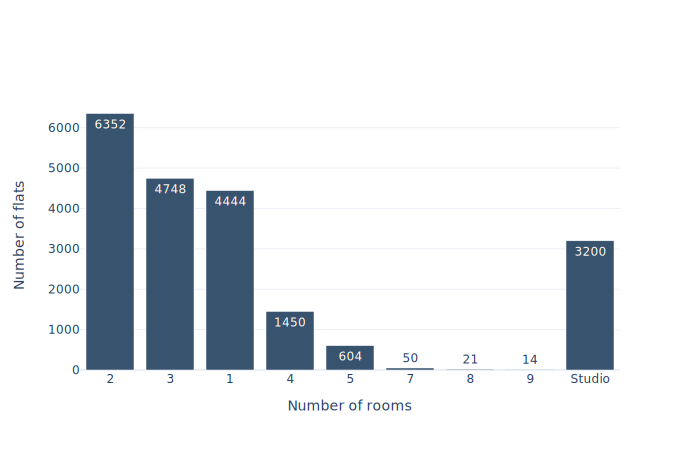

In [10]:
import plotly.graph_objects as go
fig=go.Figure([go.Bar(x=roomsCount_bar_data.index,y=roomsCount_bar_data.values,
                      text=roomsCount_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Number of rooms'),
                  template="plotly_white")

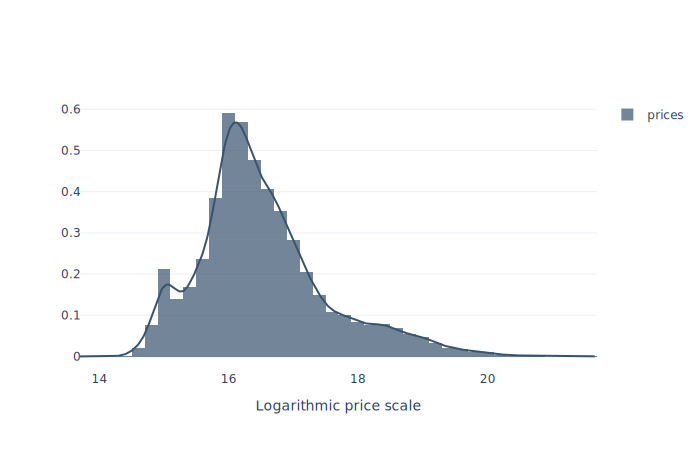

In [12]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list(np.log(df['price'].dropna()).values)],["prices"],bin_size=.2,show_rug=False,colors=['rgb(55, 83, 109)'])
fig.update_layout(xaxis=dict(title='Logarithmic price scale'),
                  template="plotly_white")
fig.show()

In [13]:
df.drop(index=list(df[df['totalArea']>1500].index))

price  roomsCount  isStudio  totalArea  \
0       79530000.0         3.0       0.0      143.0   
1       31675855.0         2.0       0.0      106.0   
2        8700000.0         2.0       0.0       41.4   
3       27500000.0         3.0       0.0       80.0   
4       26500000.0         3.0       0.0       90.2   
...            ...         ...       ...        ...   
20960   26900000.0         3.0       0.0      102.0   
20961    5587960.0         NaN       1.0       19.6   
20962    7356768.0         1.0       0.0       38.9   
20963   25106804.0         3.0       0.0      139.5   
20964  816781900.0         9.0       0.0      550.0   

                                 developerName  \
0                                  АО «ИНТЕКО»   
1                            ООО «Бакунинская»   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
20960                                      NaN   
20961                                      ПИК   
20962                ООО «Лексион Девелопмент»   
20963  Компания «Capital Group» (Капитал Груп)   
20964                                      NaN   

                                                  jkName  floorNumber  \
0                                  ЖК «Садовые Кварталы»          2.0   
1      Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...          8.0   
2                                                    NaN          2.0   
3                                                    NaN          5.0   
4                                                    NaN          9.0   
...                                                  ...          ...   
20960                                                NaN          2.0   
20961                     Жилой комплекс «Амурский парк»         30.0   
20962                                ЖК «Румянцево-Парк»         11.0   
20963                                      ЖК «Триколор»         41.0   
20964                                                NaN          6.0   

       floorsCount  longitude   latitude name railway station_0  \
0             14.0  37.570500  55.725610        Москва Киевская   
1             12.0  37.679560  55.773980       Москва Казанская   
2             17.0  37.191187  55.965546                    NaN   
3              8.0  37.555609  55.747897        Москва Киевская   
4             14.0  37.636845  55.699694                    ЗИЛ   
...            ...        ...        ...                    ...   
20960          8.0  37.658589  55.823388                   Яуза   
20961         33.0  37.755070  55.805920                    NaN   
20962         22.0  37.418660  55.631650        Новопеределкино   
20963         56.0  37.658030  55.834460                   Яуза   
20964          7.0  37.593524  55.764197                    NaN   

       distance railway station_0 name metro station_0  \
0                           1.888           Спортивная   
1                           1.233           Бауманская   
2                             NaN                  NaN   
3                           0.798             Киевская   
4                           0.980                  ЗИЛ   
...                           ...                  ...   
20960                       0.993                 ВДНХ   
20961                         NaN            Локомотив   
20962                       2.387            Саларьево   
20963                       1.040            Ростокино   
20964                         NaN           Маяковская   

       distance metro station_0 name metro station_1  \
0                         0.609          Фрунзенская   
1                         0.178       Красносельская   
2                           NaN                  NaN   
3                         0.803          Выставочная   
4                         0.789             Тульская   
...                         ...     

In [15]:
#удалим квартиры с очень большой площадью (больше 1000 кв. м.)

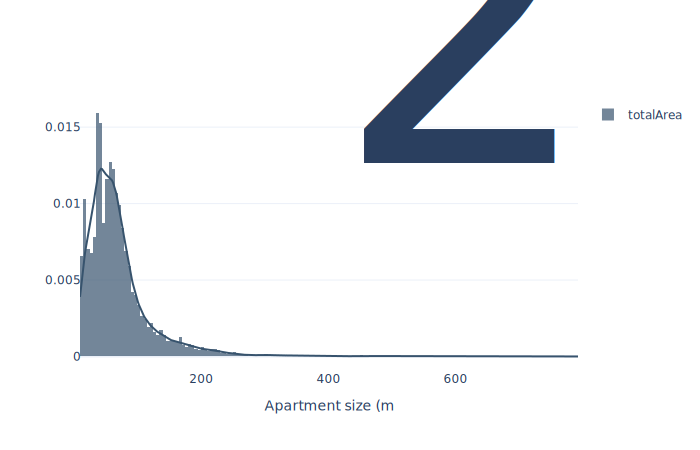

In [16]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list((df.drop(index=list(df[df['totalArea']>800].index))["totalArea"].dropna()).values)],["totalArea"],bin_size=5,show_rug=False,colors=['rgb(55, 83, 109)'])
fig.update_layout(xaxis=dict(title='Apartment size (m<sup>2</sup>)'),
                  template="plotly_white")
fig.show()

In [17]:
developer_bar_data=df["developerName"].value_counts()
developer_bar_data

ПИК                                                         2462
Компания Seven Suns Development (Севен Санс Девелопмент)    1178
Группа «Самолет»                                             544
ПАО «ИНГРАД»                                                 432
ООО «А101»                                                   411
                                                            ... 
ООО «КАПИТАЛ ГРУП»                                             1
АО «Пересвет-Инвест»                                           1
ООО «Строительный альянс»                                      1
Optima Development (Оптима Девелопмент)                        1
Группа компаний «Sun Development» (Сан Девелопмент)            1
Name: developerName, Length: 138, dtype: int64

In [18]:
#будем выводить 10% самых популярных застройщиков
developer_quantile=developer_bar_data[developer_bar_data>developer_bar_data.quantile(q=0.9)]

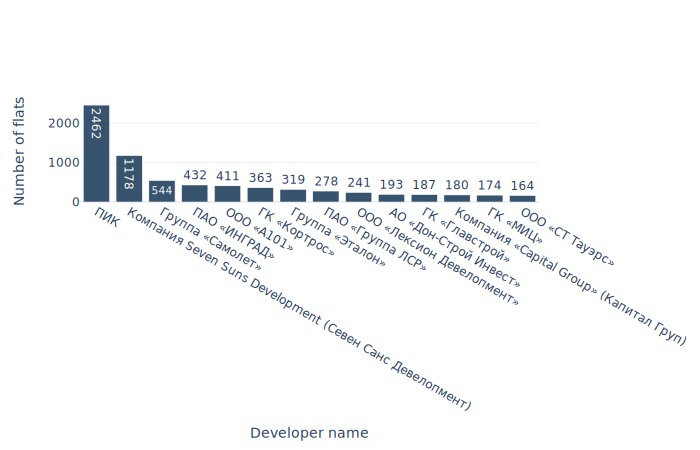

In [19]:
fig=go.Figure([go.Bar(x=developer_quantile.index,y=developer_quantile.values,
                      text=developer_quantile.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Developer name'),
                  template="plotly_white")

In [20]:
materialType_bar_data=df["materialType"].value_counts()
materialType_bar_data

Монолит    13214
Панель      4204
Кирпич      3120
Блоки        356
Дерево         6
Name: materialType, dtype: int64

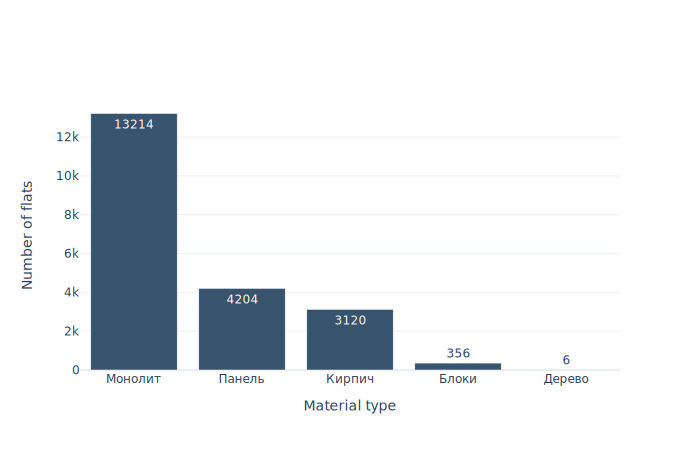

In [21]:
fig=go.Figure([go.Bar(x=materialType_bar_data.index,y=materialType_bar_data.values,
                      text=materialType_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Material type'),
                  template="plotly_white")

In [22]:
rayon_bar_data=df["rayon"].value_counts()
rayon_bar_data

Пресненский          1218
Люблино               959
Раменки               837
Даниловский           689
Хамовники             585
                     ... 
Куркино                17
Косино-Ухтомский       14
Бирюлёво Западное      13
Капотня                12
Молжаниновский          5
Name: rayon, Length: 119, dtype: int64

In [23]:
#будем выводить 10% самых популярных районов
rayon_quantile=rayon_bar_data[rayon_bar_data>rayon_bar_data.quantile(q=0.9)]

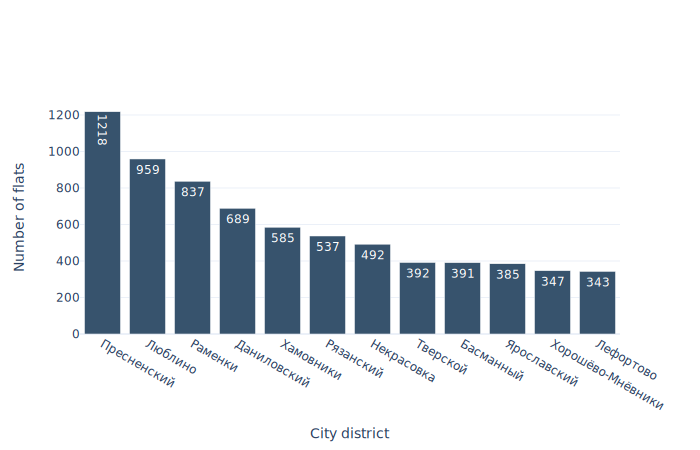

In [24]:
fig=go.Figure([go.Bar(x=rayon_quantile.index,y=rayon_quantile.values,
                      text=rayon_quantile.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='City district'),
                  template="plotly_white")

In [25]:
floorNumber_bar_data=df["floorNumber"].value_counts()
floorNumber_bar_data

1.0     2481
2.0     2207
3.0     1563
4.0     1323
5.0     1295
        ... 
90.0       1
72.0       1
63.0       1
83.0       1
95.0       1
Name: floorNumber, Length: 88, dtype: int64

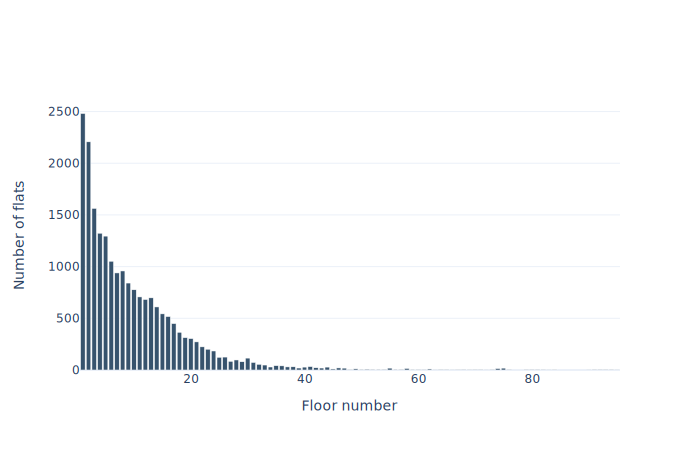

In [26]:
fig=go.Figure([go.Bar(x=floorNumber_bar_data.index,y=floorNumber_bar_data.values,
                      marker_color='rgb(55, 83, 109)')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Floor number'),
                  template="plotly_white")

In [27]:
floorsCount_bar_data=df["floorsCount"].value_counts()
floorsCount_bar_data

17.0    1623
25.0    1620
9.0     1504
5.0     1314
12.0    1241
        ... 
99.0       1
59.0       1
66.0       1
78.0       1
69.0       1
Name: floorsCount, Length: 82, dtype: int64

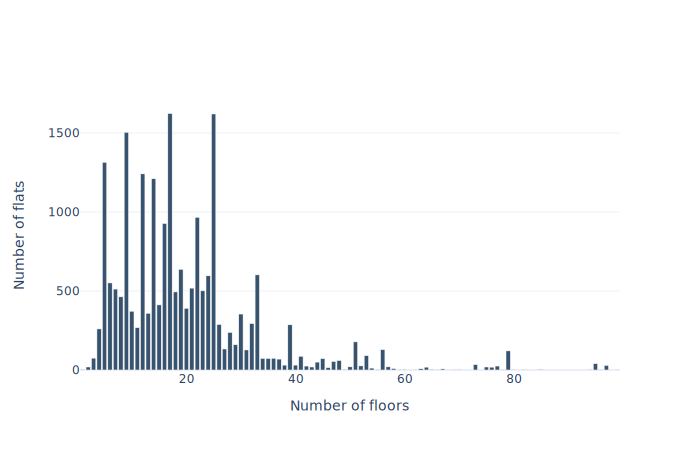

In [28]:
fig=go.Figure([go.Bar(x=floorsCount_bar_data.index,y=floorsCount_bar_data.values,
                      marker_color='rgb(55, 83, 109)')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Number of floors'),
                  template="plotly_white")

In [29]:
administrative_districts=pd.read_excel(r"C:\Users\anashinpetya\Desktop\Диплом\Районы и административные округа.xlsx",index_col=0)
administrative_districts["rayon"]=administrative_districts["Название района"].copy()
administrative_districts

Название района Административный округ          rayon
Номер                                                      
1       Академический                   ЮЗАО  Академический
2        Алексеевский                   СВАО   Алексеевский
3        Алтуфьевский                   СВАО   Алтуфьевский
4               Арбат                    ЦАО          Арбат
5            Аэропорт                    САО       Аэропорт
...               ...                    ...            ...
121      Южное Тушино                   СЗАО   Южное Тушино
122      Южнопортовый                   ЮВАО   Южнопортовый
123          Якиманка                    ЦАО       Якиманка
124       Ярославский                   СВАО    Ярославский
125           Ясенево                   ЮЗАО        Ясенево

[125 rows x 3 columns]

In [30]:
df=pd.merge(df, administrative_districts, how="left", on=["rayon"])
df["adm_district"]=df["Административный округ"].copy()

In [31]:
df=df.drop(columns=["Административный округ","Название района"])

In [32]:
adm_district_bar_data=df["adm_district"].value_counts()
adm_district_bar_data

ЦАО     3596
ЮВАО    3145
ЗАО     2706
СВАО    2354
САО     1839
ЮАО     1790
ВАО     1083
ЮЗАО    1036
СЗАО     990
Name: adm_district, dtype: int64

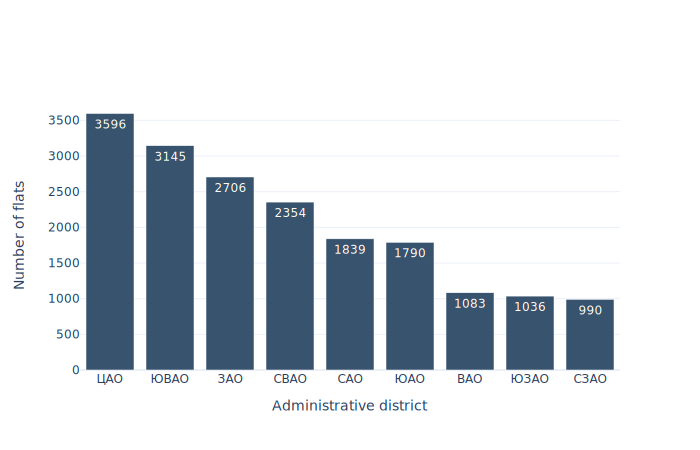

In [33]:
fig=go.Figure([go.Bar(x=adm_district_bar_data.index,y=adm_district_bar_data.values,
                      text=adm_district_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Administrative district'),
                  template="plotly_white")

In [34]:
#проверяем, совпадает ли кол-во заполненных ячеек у районов и административных округов
#если не совпадает, то есть район, у которого не указан административный округ

In [35]:
df["rayon"].isna().sum()

2303

In [36]:
df.shape[0]-sum(adm_district_bar_data)

2426

In [37]:
#выводим район, у которого нет административного округа

In [38]:
df[df["adm_district"].isna()][df["rayon"].notna()]["rayon"].value_counts()

<ipython-input-38-53fbd855d058>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Зеленоград    123
Name: rayon, dtype: int64

In [39]:
#у Зеленограда проставим ЗелАО

In [40]:
df.loc[list(df[df["adm_district"].isna()][df["rayon"].notna()]["adm_district"].index),"adm_district"]="ЗелАО"

<ipython-input-40-77d0e8baeb03>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [41]:
adm_district_bar_data=df["adm_district"].value_counts()
adm_district_bar_data

ЦАО      3596
ЮВАО     3145
ЗАО      2706
СВАО     2354
САО      1839
ЮАО      1790
ВАО      1083
ЮЗАО     1036
СЗАО      990
ЗелАО     123
Name: adm_district, dtype: int64

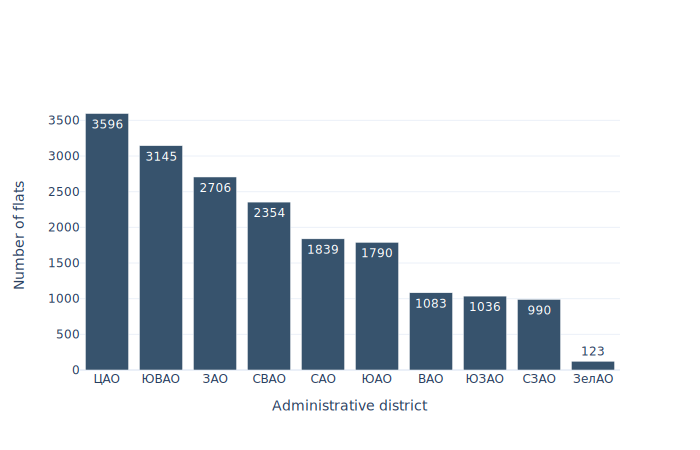

In [42]:
fig=go.Figure([go.Bar(x=adm_district_bar_data.index,y=adm_district_bar_data.values,
                      text=adm_district_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Administrative district'),
                  template="plotly_white")

In [43]:
buildYear_bar_data=df["buildYear"].value_counts()
buildYear_bar_data.index=map(lambda x: str(int(x)),buildYear_bar_data.index)
buildYear_bar_data

1958    296
2017    289
2018    284
2009    257
2011    242
       ... 
1945      1
1875      1
1860      1
1886      1
1830      1
Name: buildYear, Length: 136, dtype: int64

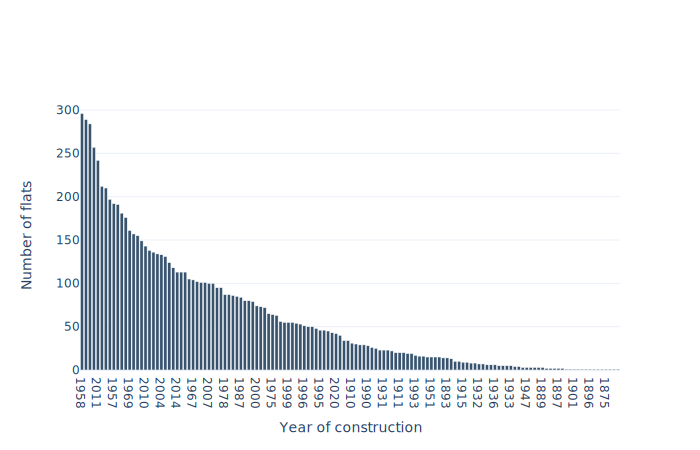

In [44]:
fig=go.Figure([go.Bar(x=buildYear_bar_data.index,y=buildYear_bar_data.values,
                      marker_color='rgb(55, 83, 109)')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Year of construction'),
                  template="plotly_white")

In [45]:
#топ 20 самых популярных годов постройки

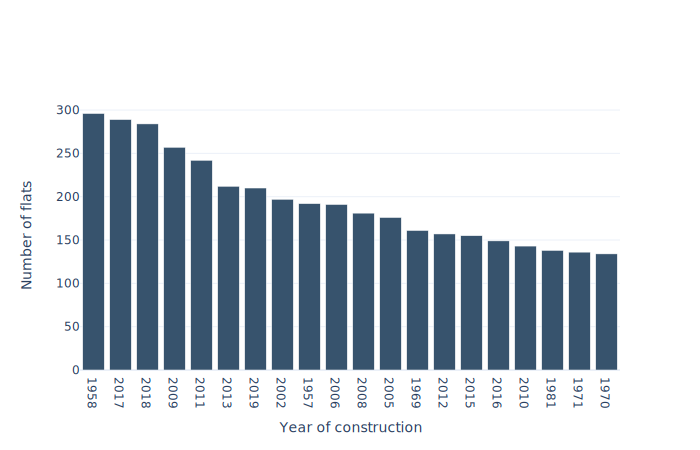

In [46]:
fig=go.Figure([go.Bar(x=buildYear_bar_data.iloc[:20].index,y=buildYear_bar_data.iloc[:20].values,
                      marker_color='rgb(55, 83, 109)')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Year of construction'),
                  template="plotly_white")

In [47]:
#посмотрим, у каждого ли ЖК указано название девелопера

In [48]:
df["developerName"].notna().sum()

10265

In [49]:
df["jkName"].notna().sum()

10278

In [50]:
#получилось, что если указано название жк, то указано и название девелопера, то есть строки одновременно заполнены в столбцах jkName и developerName
#исключение составляют 13 предложений (есть название ЖК, но нет названия девелопера). Выведем их

In [51]:
df[df["jkName"].notna()][df[df["jkName"].notna()]["developerName"].isna()]

price  roomsCount  isStudio  totalArea developerName  \
983      9356970.0         NaN       1.0       27.9           NaN   
3060   222200000.0         5.0       0.0      235.7           NaN   
4502     9180400.0         NaN       1.0       28.0           NaN   
5555     9286800.0         NaN       1.0       28.0           NaN   
5717    18755310.0         2.0       0.0       66.9           NaN   
9999     9191600.0         NaN       1.0       28.0           NaN   
11069    9971600.0         NaN       1.0       28.9           NaN   
11749  322646400.0         5.0       0.0      336.0           NaN   
13448  220000000.0         7.0       0.0      236.0           NaN   
14275   12000000.0         1.0       0.0       43.2           NaN   
14861   17893600.0         2.0       0.0       62.9           NaN   
16819    9931140.0         NaN       1.0       28.9           NaN   
17938    9281200.0         NaN       1.0       28.0           NaN   

                                                  jkName  floorNumber  \
983                                         ЖК «Огни-2»          38.0   
3060   Апарт-отель «Caméo Moscow Villas» (Камео Моско...          1.0   
4502                                        ЖК «Огни-2»          39.0   
5555                                        ЖК «Огни-2»          37.0   
5717                                        ЖК «Огни-2»          41.0   
9999                                        ЖК «Огни-2»          35.0   
11069                                       ЖК «Огни-2»          38.0   
11749  Апарт-отель «Caméo Moscow Villas» (Камео Моско...          1.0   
13448  Апарт-отель «Caméo Moscow Villas» (Камео Моско...          1.0   
14275                                    ЖК «Павлова 40»          3.0   
14861                                       ЖК «Огни-2»          41.0   
16819                                       ЖК «Огни-2»          37.0   
17938                                       ЖК «Огни-2»          36.0   

       floorsCount  longitude  latitude name railway station_0  \
983           41.0   37.47669  55.69603            Матвеевская   
3060           2.0   37.60050  55.77592     Москва Белорусская   
4502          41.0   37.47669  55.69603            Матвеевская   
5555          41.0   37.47669  55.69603            Матвеевская   
5717          41.0   37.47669  55.69603            Матвеевская   
9999          41.0   37.47669  55.69603            Матвеевская   
11069         41.0   37.47669  55.69603            Матвеевская   
11749          3.0   37.60050  55.77592     Москва Белорусская   
13448          3.0   37.60050  55.77592     Москва Белорусская   
14275         11.0   37.40718  55.74396              Кунцево-2   
14861         41.0   37.47669  55.69603            Матвеевская   
16819         41.0   37.47669  55.69603            Матвеевская   
17938         41.0   37.47669  55.69603            Матвеевская   

       distance railway station_0 name metro station_0  \
983                         0.918              Раменки   
3060                        1.336       Новослободская   
4502                        0.918              Раменки   
5555                        0.918              Раменки   
5717                        0.918              Раменки   
9999                        0.918              Раменки   
11069                       0.918              Раменки   
11749                       1.336       Новослободская   
13448                       1.336       Новослободская   
14275                       1.828           Молодежная   
14861                       0.918              Раменки   
16819                       0.918              Раменки   
17938                       0.918              Раменки   

       distance metro station_0    name metro station_1  \
983                       1.375  Ломоносовский проспект   
3060                      0.410           Менделеевская   
4502                      1.375  Ломоносовский проспект   
5555                      1.375  Ломоносовский пр

In [52]:
#количество ЖК

In [53]:
len(np.unique(df["jkName"].dropna()))

305

In [54]:
#загружаем таблицу с распределением ЖК по классам
jk_class=pd.read_excel(r"C:\Users\anashinpetya\Desktop\Диплом\классы ЖК.xlsx")
jk_class["jkName"]=jk_class["Название ЖК"].copy()
jk_class=jk_class.drop(columns=["Название ЖК"])
jk_class

jkClass                                             jkName
0     бизнес  Апарт-квартал «TriBeCa apartments» (ТрайБеКа а...
1    элитный      Апарт-комплекс «Art Residence» (Арт Резиденс)
2     бизнес  Апарт-комплекс «KAZAKOV Grand Loft» (КАЗАКОВ Г...
3     бизнес                             Апарт-комплекс «Волга»
4    комфорт                   Апарт-комплекс «Движение.Тушино»
..       ...                                                ...
300  элитный                          Резиденция «Вишневый сад»
301  элитный                         Резиденция на Всеволожском
302  комфорт                               Сити-комплекс «Мята»
303  элитный                               Элитный дом «Реномэ»
304  элитный            ​Элитный комплекс «Резиденция Тверская»

[305 rows x 2 columns]

In [55]:
df=pd.merge(df, jk_class, how="left", on=["jkName"])
df

price  roomsCount  isStudio  totalArea  \
0       79530000.0         3.0       0.0      143.0   
1       31675855.0         2.0       0.0      106.0   
2        8700000.0         2.0       0.0       41.4   
3       27500000.0         3.0       0.0       80.0   
4       26500000.0         3.0       0.0       90.2   
...            ...         ...       ...        ...   
20960   26900000.0         3.0       0.0      102.0   
20961    5587960.0         NaN       1.0       19.6   
20962    7356768.0         1.0       0.0       38.9   
20963   25106804.0         3.0       0.0      139.5   
20964  816781900.0         9.0       0.0      550.0   

                                 developerName  \
0                                  АО «ИНТЕКО»   
1                            ООО «Бакунинская»   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
20960                                      NaN   
20961                                      ПИК   
20962                ООО «Лексион Девелопмент»   
20963  Компания «Capital Group» (Капитал Груп)   
20964                                      NaN   

                                                  jkName  floorNumber  \
0                                  ЖК «Садовые Кварталы»          2.0   
1      Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...          8.0   
2                                                    NaN          2.0   
3                                                    NaN          5.0   
4                                                    NaN          9.0   
...                                                  ...          ...   
20960                                                NaN          2.0   
20961                     Жилой комплекс «Амурский парк»         30.0   
20962                                ЖК «Румянцево-Парк»         11.0   
20963                                      ЖК «Триколор»         41.0   
20964                                                NaN          6.0   

       floorsCount  longitude   latitude name railway station_0  \
0             14.0  37.570500  55.725610        Москва Киевская   
1             12.0  37.679560  55.773980       Москва Казанская   
2             17.0  37.191187  55.965546                    NaN   
3              8.0  37.555609  55.747897        Москва Киевская   
4             14.0  37.636845  55.699694                    ЗИЛ   
...            ...        ...        ...                    ...   
20960          8.0  37.658589  55.823388                   Яуза   
20961         33.0  37.755070  55.805920                    NaN   
20962         22.0  37.418660  55.631650        Новопеределкино   
20963         56.0  37.658030  55.834460                   Яуза   
20964          7.0  37.593524  55.764197                    NaN   

       distance railway station_0 name metro station_0  \
0                           1.888           Спортивная   
1                           1.233           Бауманская   
2                             NaN                  NaN   
3                           0.798             Киевская   
4                           0.980                  ЗИЛ   
...                           ...                  ...   
20960                       0.993                 ВДНХ   
20961                         NaN            Локомотив   
20962                       2.387            Саларьево   
20963                       1.040            Ростокино   
20964                         NaN           Маяковская   

       distance metro station_0 name metro station_1  \
0                         0.609          Фрунзенская   
1                         0.178       Красносельская   
2                           NaN                  NaN   
3                         0.803          Выставочная   
4                         0.789             Тульская   
...                         ...     

In [56]:
jkClass_bar_data=df["jkClass"].value_counts()
jkClass_bar_data

комфорт    5311
бизнес     3528
эконом      753
элитный     686
Name: jkClass, dtype: int64

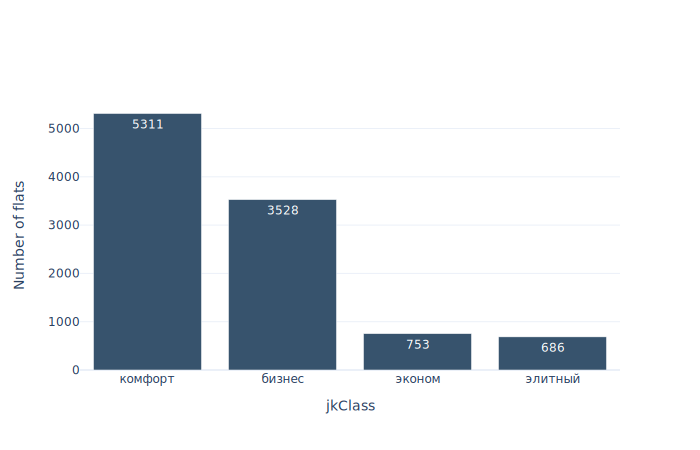

In [57]:
fig=go.Figure([go.Bar(x=jkClass_bar_data.index,y=jkClass_bar_data.values,
                      text=jkClass_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='jkClass'),
                  template="plotly_white")

# Bag of words based on flat description (the method was not used in final model)

In [134]:
#попытаемся понять количество уникальных слов в description, чтобы, возможно, составить словарь
df["description"]=df["description"].astype("str")

In [135]:
full_description=df["description"].dropna().sum()

In [136]:
#пример суммирования description'ов на первых пяти предложениях
df["description"].iloc[0:5].sum()

'«Садовые кварталы» - уникальная концепция премиальной жизни клубного формата.<br>- Инфраструктура премиального уровня, которая соответствует самым высоким стандартам проживания; <br>- Жилой комплекс премиум-класса с клубными домами, разделен на кварталы: каждая территория приватна, предназначена только для жильцов и их гостей, объединена общей зоной отдыха; <br>- На верхних этажах комплекса представлены роскошные пентхаусы с открытыми террасами и каминами, французскими стеклянными балконами; <br>- Территория комплекса исключительно пешеходная, для автомобилей оборудован подземный паркинг (по 1-2 машиноместа для каждой квартиры); <br>- Центральная зона для отдыха с прудом с мостиками и детской площадкой; <br>- Самый комфортабельный и престижный центральный район Москвы – Хамовники.\xa0 <br>ПОЗВОНИТЕ И ЭКСПЕРТ ПОДРОБНО РАССКАЖЕТ О ПРОЕКТЕ И НАЗНАЧИТ ПРОСМОТР В УДОБНОЕ ВРЕМЯ.Предлагается 2-комнатные апартаменты, общей площадью 105.9 кв. м на 8 этаже в ЖК Tatlin Apartments, одном из самых

In [137]:
#убираем лишние символы, оставляем только кириллицу (пример первых пяти предложений)
import re

res = re.sub(r'[^А-я ]', ' ', df["description"].iloc[0:5].sum())
res

' Садовые кварталы    уникальная концепция премиальной жизни клубного формата       Инфраструктура премиального уровня  которая соответствует самым высоким стандартам проживания        Жилой комплекс премиум класса с клубными домами  разделен на кварталы  каждая территория приватна  предназначена только для жильцов и их гостей  объединена общей зоной отдыха        На верхних этажах комплекса представлены роскошные пентхаусы с открытыми террасами и каминами  французскими стеклянными балконами        Территория комплекса исключительно пешеходная  для автомобилей оборудован подземный паркинг  по     машиноместа для каждой квартиры         Центральная зона для отдыха с прудом с мостиками и детской площадкой        Самый комфортабельный и престижный центральный район Москвы   Хамовники       ПОЗВОНИТЕ И ЭКСПЕРТ ПОДРОБНО РАССКАЖЕТ О ПРОЕКТЕ И НАЗНАЧИТ ПРОСМОТР В УДОБНОЕ ВРЕМЯ Предлагается   комнатные апартаменты  общей площадью       кв  м на   этаже в ЖК                    одном из самых зн

In [138]:
import re

result = re.sub(r'[^А-я ]', ' ', full_description)

In [139]:
#удаляем лишние пробелы
res=re.sub(" +", " ", res)
res

' Садовые кварталы уникальная концепция премиальной жизни клубного формата Инфраструктура премиального уровня которая соответствует самым высоким стандартам проживания Жилой комплекс премиум класса с клубными домами разделен на кварталы каждая территория приватна предназначена только для жильцов и их гостей объединена общей зоной отдыха На верхних этажах комплекса представлены роскошные пентхаусы с открытыми террасами и каминами французскими стеклянными балконами Территория комплекса исключительно пешеходная для автомобилей оборудован подземный паркинг по машиноместа для каждой квартиры Центральная зона для отдыха с прудом с мостиками и детской площадкой Самый комфортабельный и престижный центральный район Москвы Хамовники ПОЗВОНИТЕ И ЭКСПЕРТ ПОДРОБНО РАССКАЖЕТ О ПРОЕКТЕ И НАЗНАЧИТ ПРОСМОТР В УДОБНОЕ ВРЕМЯ Предлагается комнатные апартаменты общей площадью кв м на этаже в ЖК одном из самых знаковых проектов в Басманном районе Москвы Все апартаменты продаются с отделкой Седьмой этаж дома

In [140]:
result=re.sub(" +", " ", result)

In [141]:
#сдалем все слова с одинаковым регистром (все буквы будут строчными)
result=result.lower()

In [142]:
#заменим все ё на е
result=result.replace("ё","е")

In [143]:
#создадим словарь, в котором выведем список уникальных слов и количество повторов
from collections import Counter
result_counter=Counter(result.split(" ")).items()

In [156]:
#исключим слова, у которых длина слова меньше 5 символов, т.к. как правило это союзы, частицы и пр.
words_df=pd.DataFrame(result_counter,columns=["word","count"])
words_df["word_length"]=words_df["word"].apply(lambda x: len(x))
words_df=words_df[words_df["word_length"]>4].sort_values(by=["count"],ascending=False)
words_df

word  count  word_length
280        квартира  22894            8
311           метро  16255            5
19         комплекс  10467            8
692           минут  10132            5
74           москвы   9873            6
...             ...    ...          ...
24584       навесов      1            7
24585        пергол      1            6
24587      черемуха      1            8
24588      изгородь      1            8
35988  закрепленных      1           12

[33264 rows x 3 columns]

In [157]:
#проведем стемминг при помощи библиотеки nltk
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")
words_df["word_stem"]=words_df["word"].apply(lambda x: snowball.stem(x))
words_df

word  count  word_length  word_stem
280        квартира  22894            8    квартир
311           метро  16255            5       метр
19         комплекс  10467            8   комплекс
692           минут  10132            5      минут
74           москвы   9873            6      москв
...             ...    ...          ...        ...
24584       навесов      1            7      навес
24585        пергол      1            6     пергол
24587      черемуха      1            8    черемух
24588      изгородь      1            8    изгород
35988  закрепленных      1           12  закреплен

[33264 rows x 4 columns]

In [167]:
words_df=words_df.reset_index().drop(columns=["index"])
words_df

word  count  word_length  word_stem
0          квартира  22894            8    квартир
1             метро  16255            5       метр
2          комплекс  10467            8   комплекс
3             минут  10132            5      минут
4            москвы   9873            6      москв
...             ...    ...          ...        ...
33259       навесов      1            7      навес
33260        пергол      1            6     пергол
33261      черемуха      1            8    черемух
33262      изгородь      1            8    изгород
33263  закрепленных      1           12  закреплен

[33264 rows x 4 columns]

In [178]:
words_df_grouped=words_df[["count","word_stem"]].groupby(by=["word_stem"],as_index=False).sum()
words_df_grouped

word_stem  count
0                    1
1            аа      3
2          аавс      1
3          аакц      1
4        абажур      1
...         ...    ...
14083   яхтклуб     14
14084     ячеек      1
14085     ячейк    287
14086      яшин      3
14087      ящик      6

[14088 rows x 2 columns]

In [179]:
#words_df_grouped.to_excel(r"C:\Users\anashinpetya\Desktop\Диплом\список слов со стеммингом.xlsx",index=False)

In [181]:
#words_df.to_excel(r"C:\Users\anashinpetya\Desktop\Диплом\подсчет слов + стемминг.xlsx",index=False)

# Делаем колонки с поиском ключевых слов

In [1531]:
words_of_interest=pd.read_excel(r"C:\Users\anashinpetya\Desktop\Диплом\Выделенные слова.xlsx")
words_of_interest

word_stem  count word of interest?
0   видеонаблюден   2090               Yes
1      дизайнерск   2029               Yes
2        консьерж   1647               Yes
3      историческ   1627               Yes
4          террас   1327               Yes
5          грузов   1232               Yes
6       натуральн    798               Yes
7           камин    728               Yes
8         кабинет    679               Yes
9        пентхаус    479               Yes
10        особняк    374               Yes
11          охран    313               Yes
12       резиденц    235               Yes
13          пород    234               Yes
14           саун    191               Yes
15     электрокар     99               Yes
16      конференц     53               Yes

In [1532]:
#выделим отдельный столбец под измененный description (сделаем текст в том же формате, в котором получили список ключевых слов)
df["description_modified"]=df["description"].copy()
df["description_modified"]

0        «Садовые кварталы» - уникальная концепция прем...
1        Предлагается 2-комнатные апартаменты, общей пл...
2        Евродвушка на базе 1-комнатной квартиры свобод...
3        Лот 62247. В западном округе Москвы в кирпично...
4        Id 18914. ВНИМАНИЕ, СУПЕР ПРЕДЛОЖЕНИЕ. Предлаг...
                               ...                        
20960    Предлагается просторная 3-комнатная квартира с...
20961    Новостройка! Продается 1-комн. кв-ра площадью ...
20962    Скидка до 5% при 100% оплате! При покупке сраз...
20963    Жилой комплекс «Триколор» – это современные ин...
20964    ID: 1481 В продаже роскошный трехсторонний  пе...
Name: description_modified, Length: 20965, dtype: object

In [1533]:
#приводим к строковому типу
df["description_modified"]=df["description_modified"].astype("str")

In [1534]:
#убираем всё, кроме кириллицы
import re
df["description_modified"]=df["description_modified"].apply(lambda x: re.sub(r'[^А-я ]', ' ', x))
df["description_modified"]

0         Садовые кварталы    уникальная концепция прем...
1        Предлагается   комнатные апартаменты  общей пл...
2        Евродвушка на базе   комнатной квартиры свобод...
3        Лот        В западном округе Москвы в кирпично...
4                  ВНИМАНИЕ  СУПЕР ПРЕДЛОЖЕНИЕ  Предлаг...
                               ...                        
20960    Предлагается просторная   комнатная квартира с...
20961    Новостройка  Продается   комн  кв ра площадью ...
20962    Скидка до    при      оплате  При покупке сраз...
20963    Жилой комплекс  Триколор    это современные ин...
20964             В продаже роскошный трехсторонний  пе...
Name: description_modified, Length: 20965, dtype: object

In [1535]:
#удаляем лишние пробелы
df["description_modified"]=df["description_modified"].apply(lambda x: re.sub(" +", " ", x))
df["description_modified"]

0         Садовые кварталы уникальная концепция премиал...
1        Предлагается комнатные апартаменты общей площа...
2        Евродвушка на базе комнатной квартиры свободно...
3        Лот В западном округе Москвы в кирпичном доме ...
4         ВНИМАНИЕ СУПЕР ПРЕДЛОЖЕНИЕ Предлагаю к продаж...
                               ...                        
20960    Предлагается просторная комнатная квартира с с...
20961    Новостройка Продается комн кв ра площадью кв м...
20962    Скидка до при оплате При покупке сразу двух кл...
20963    Жилой комплекс Триколор это современные инжене...
20964     В продаже роскошный трехсторонний пентхаус в ...
Name: description_modified, Length: 20965, dtype: object

In [1536]:
#сдалем все слова с одинаковым регистром (все буквы будут строчными)
df["description_modified"]=df["description_modified"].apply(lambda x: x.lower())
df["description_modified"]

0         садовые кварталы уникальная концепция премиал...
1        предлагается комнатные апартаменты общей площа...
2        евродвушка на базе комнатной квартиры свободно...
3        лот в западном округе москвы в кирпичном доме ...
4         внимание супер предложение предлагаю к продаж...
                               ...                        
20960    предлагается просторная комнатная квартира с с...
20961    новостройка продается комн кв ра площадью кв м...
20962    скидка до при оплате при покупке сразу двух кл...
20963    жилой комплекс триколор это современные инжене...
20964     в продаже роскошный трехсторонний пентхаус в ...
Name: description_modified, Length: 20965, dtype: object

In [1537]:
#заменим все ё на е
df["description_modified"]=df["description_modified"].apply(lambda x: x.replace("ё","е"))
df["description_modified"]

0         садовые кварталы уникальная концепция премиал...
1        предлагается комнатные апартаменты общей площа...
2        евродвушка на базе комнатной квартиры свободно...
3        лот в западном округе москвы в кирпичном доме ...
4         внимание супер предложение предлагаю к продаж...
                               ...                        
20960    предлагается просторная комнатная квартира с с...
20961    новостройка продается комн кв ра площадью кв м...
20962    скидка до при оплате при покупке сразу двух кл...
20963    жилой комплекс триколор это современные инжене...
20964     в продаже роскошный трехсторонний пентхаус в ...
Name: description_modified, Length: 20965, dtype: object

In [ ]:
#для списка слов
for word in list(words_of_interest["word_stem"]):
    df["word "+word]=df["description_modified"].apply(lambda x: x.find(word))>-1
    df["word "+word]=df["word "+word].astype("int")
df

# In reality, key words did not improve the final model that is why they were not used

# Data processing

In [58]:
#проверим максимальное расстояние до станции метро и жд (если оно слишком большое, то это ненормально, указывают станции сами люди)
#станции метро
df[["distance metro station_0","distance metro station_1","distance metro station_2","distance metro station_3",
   "distance metro station_4","distance metro station_5","distance metro station_6","distance metro station_7",
   "distance metro station_8","distance metro station_9"]].max()

distance metro station_0    4.982
distance metro station_1    4.980
distance metro station_2    4.999
distance metro station_3    4.993
distance metro station_4    5.000
distance metro station_5    4.991
distance metro station_6    4.999
distance metro station_7    4.997
distance metro station_8    4.995
distance metro station_9    4.995
dtype: float64

In [59]:
#станции жд
df[["distance railway station_0","distance railway station_1","distance railway station_2","distance railway station_3",
   "distance railway station_4","distance railway station_5","distance railway station_6","distance railway station_7"]].max()

distance railway station_0    4.998
distance railway station_1    4.994
distance railway station_2    4.989
distance railway station_3    5.000
distance railway station_4    4.992
distance railway station_5    4.824
distance railway station_6    4.927
distance railway station_7    3.296
dtype: float64

In [60]:
#все станции в пределах 5км, что является нормой

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20965 entries, 0 to 20964
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20964 non-null  float64
 1   roomsCount                  17683 non-null  float64
 2   isStudio                    20964 non-null  float64
 3   totalArea                   20964 non-null  float64
 4   developerName               10265 non-null  object 
 5   jkName                      10278 non-null  object 
 6   floorNumber                 20900 non-null  float64
 7   floorsCount                 20900 non-null  float64
 8   longitude                   20964 non-null  float64
 9   latitude                    20964 non-null  float64
 10  name railway station_0      16670 non-null  object 
 11  distance railway station_0  16670 non-null  float64
 12  name metro station_0        19592 non-null  object 
 13  distance metro station_0    195

In [62]:
#сделаем целыми значениями следующие столбцы: roomsCount,isStudio,floorNumber,floorsCount,buildYear,isPhone,isPartOfRenovationProgram
#сначала во все столбцы, где есть пропуски, вставим в пустые ячейки значение -1.0
for column in ["roomsCount","isStudio","floorNumber","floorsCount","buildYear","isPhone","isPartOfRenovationProgram"]:
    df[column].fillna(-1.0,inplace=True)
    df[column]=df[column].astype("int32")

In [63]:
df

price  roomsCount  isStudio  totalArea  \
0       79530000.0           3         0      143.0   
1       31675855.0           2         0      106.0   
2        8700000.0           2         0       41.4   
3       27500000.0           3         0       80.0   
4       26500000.0           3         0       90.2   
...            ...         ...       ...        ...   
20960   26900000.0           3         0      102.0   
20961    5587960.0          -1         1       19.6   
20962    7356768.0           1         0       38.9   
20963   25106804.0           3         0      139.5   
20964  816781900.0           9         0      550.0   

                                 developerName  \
0                                  АО «ИНТЕКО»   
1                            ООО «Бакунинская»   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
20960                                      NaN   
20961                                      ПИК   
20962                ООО «Лексион Девелопмент»   
20963  Компания «Capital Group» (Капитал Груп)   
20964                                      NaN   

                                                  jkName  floorNumber  \
0                                  ЖК «Садовые Кварталы»            2   
1      Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...            8   
2                                                    NaN            2   
3                                                    NaN            5   
4                                                    NaN            9   
...                                                  ...          ...   
20960                                                NaN            2   
20961                     Жилой комплекс «Амурский парк»           30   
20962                                ЖК «Румянцево-Парк»           11   
20963                                      ЖК «Триколор»           41   
20964                                                NaN            6   

       floorsCount  longitude   latitude name railway station_0  \
0               14  37.570500  55.725610        Москва Киевская   
1               12  37.679560  55.773980       Москва Казанская   
2               17  37.191187  55.965546                    NaN   
3                8  37.555609  55.747897        Москва Киевская   
4               14  37.636845  55.699694                    ЗИЛ   
...            ...        ...        ...                    ...   
20960            8  37.658589  55.823388                   Яуза   
20961           33  37.755070  55.805920                    NaN   
20962           22  37.418660  55.631650        Новопеределкино   
20963           56  37.658030  55.834460                   Яуза   
20964            7  37.593524  55.764197                    NaN   

       distance railway station_0 name metro station_0  \
0                           1.888           Спортивная   
1                           1.233           Бауманская   
2                             NaN                  NaN   
3                           0.798             Киевская   
4                           0.980                  ЗИЛ   
...                           ...                  ...   
20960                       0.993                 ВДНХ   
20961                         NaN            Локомотив   
20962                       2.387            Саларьево   
20963                       1.040            Ростокино   
20964                         NaN           Маяковская   

       distance metro station_0 name metro station_1  \
0                         0.609          Фрунзенская   
1                         0.178       Красносельская   
2                           NaN                  NaN   
3                         0.803          Выставочная   
4                         0.789             Тульская   
...                         ...     

In [64]:
#пропуски в livingArea и kitchenArea также заполним -1.0 м²
for column in ["livingArea","kitchenArea"]:
    df[column].fillna("-1.0 м²",inplace=True)
    df[column]=[item.split(" ")[0] for item in list(df[column])]

In [65]:
df[["livingArea","kitchenArea"]]

livingArea kitchenArea
0           -1.0        -1.0
1           -1.0        -1.0
2             29           8
3           -1.0        -1.0
4           46.1        20.5
...          ...         ...
20960         63           9
20961        9.4           5
20962       13.4        13.7
20963       -1.0        -1.0
20964       -1.0        -1.0

[20965 rows x 2 columns]

In [66]:
for class_type,index in zip(df.dtypes,df.dtypes.index):
    if class_type=="object":
        df[index].fillna("нет",inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20965 entries, 0 to 20964
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       20964 non-null  float64
 1   roomsCount                  20965 non-null  int32  
 2   isStudio                    20965 non-null  int32  
 3   totalArea                   20964 non-null  float64
 4   developerName               20965 non-null  object 
 5   jkName                      20965 non-null  object 
 6   floorNumber                 20965 non-null  int32  
 7   floorsCount                 20965 non-null  int32  
 8   longitude                   20964 non-null  float64
 9   latitude                    20964 non-null  float64
 10  name railway station_0      20965 non-null  object 
 11  distance railway station_0  16670 non-null  float64
 12  name metro station_0        20965 non-null  object 
 13  distance metro station_0    195

In [68]:
#посмотрим, сколько пропусков у столбцов с данными по расстоянию до ж/д станций и станций метро
df=df.dropna(subset=["price"])
railway_metro_distance_labels=df.isna().sum()[df.isna().sum()>0].index
df.isna().sum()[df.isna().sum()>0]

distance railway station_0     4294
distance metro station_0       1372
distance metro station_1       1724
distance metro station_2       2389
distance metro station_3       3551
distance metro station_4       4783
distance metro station_5       6438
distance metro station_6       9679
distance metro station_7      13266
distance metro station_8      17030
distance railway station_1     6827
distance railway station_2    10645
distance railway station_3    14548
distance railway station_4    18086
distance metro station_9      18986
distance railway station_5    19626
distance railway station_6    20391
distance railway station_7    20962
dtype: int64

<b>Можно сократить количество указанных станций метро до 5, ж/д станций - до двух</b>

In [69]:
sorted(railway_metro_distance_labels)

['distance metro station_0',
 'distance metro station_1',
 'distance metro station_2',
 'distance metro station_3',
 'distance metro station_4',
 'distance metro station_5',
 'distance metro station_6',
 'distance metro station_7',
 'distance metro station_8',
 'distance metro station_9',
 'distance railway station_0',
 'distance railway station_1',
 'distance railway station_2',
 'distance railway station_3',
 'distance railway station_4',
 'distance railway station_5',
 'distance railway station_6',
 'distance railway station_7']

In [70]:
#количество станций метро
df["metroCount"]=df[sorted(railway_metro_distance_labels)[0:10]].count(axis=1)
df["metroCount"]

0         9
1         5
2         0
3         8
4         7
         ..
20960     5
20961    10
20962     3
20963     6
20964    10
Name: metroCount, Length: 20964, dtype: int64

In [71]:
#количество ж/д станций
df["railwayCount"]=df[sorted(railway_metro_distance_labels)[10:]].count(axis=1)
df["railwayCount"]

0        1
1        5
2        0
3        2
4        3
        ..
20960    5
20961    0
20962    4
20963    4
20964    0
Name: railwayCount, Length: 20964, dtype: int64

In [72]:
#сделаем столбцы с минимальным расстоянием до ж/д станций и станций метро, затем удалим столбцы с  названиями
#каждой станции метро и расстоянием до каждой станции
distance_metro_columns=[]
for i in range(0,10):
    distance_metro_columns.append("distance metro station_"+str(i))
distance_railway_columns=[]
for i in range(0,8):
    distance_railway_columns.append("distance railway station_"+str(i))
df["min_metro_distance"]=df[distance_metro_columns].min(axis=1)
df["min_railway_distance"]=df[distance_railway_columns].min(axis=1)
name_metro_columns=[]
name_railway_columns=[]
for word in distance_metro_columns:
    name_metro_columns.append(word.replace("distance","name"))
for word in distance_railway_columns:
    name_railway_columns.append(word.replace("distance","name"))
df.drop(columns=name_metro_columns,inplace=True)
df.drop(columns=name_railway_columns,inplace=True)
df.drop(columns=distance_metro_columns,inplace=True)
df.drop(columns=distance_railway_columns,inplace=True)

In [73]:
metroCount_bar_data=df["metroCount"].value_counts()
metroCount_bar_data.index=map(lambda x: str(int(x)),metroCount_bar_data.index)

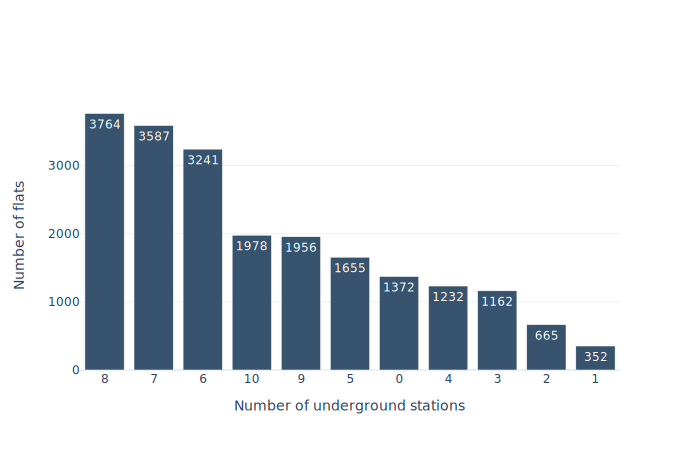

In [74]:
import plotly.graph_objects as go
fig=go.Figure([go.Bar(x=metroCount_bar_data.index,y=metroCount_bar_data.values,
                      text=metroCount_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Number of underground stations'),
                  template="plotly_white")

In [75]:
railwayCount_bar_data=df["railwayCount"].value_counts()
railwayCount_bar_data.index=map(lambda x: str(int(x)),railwayCount_bar_data.index)

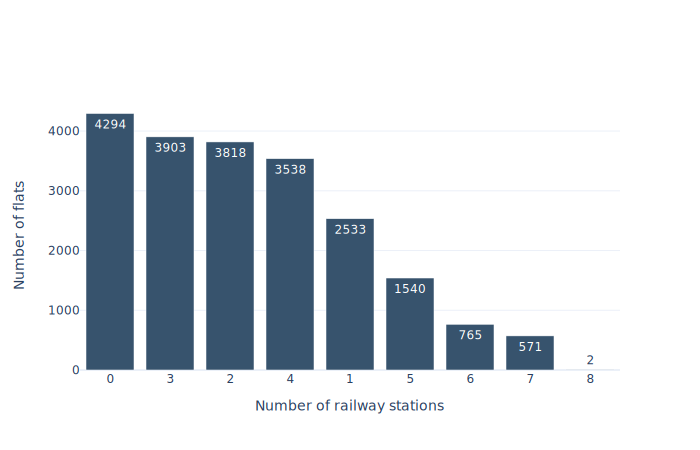

In [76]:
import plotly.graph_objects as go
fig=go.Figure([go.Bar(x=railwayCount_bar_data.index,y=railwayCount_bar_data.values,
                      text=railwayCount_bar_data.values,marker_color='rgb(55, 83, 109)',textposition='auto')])
fig.update_layout(yaxis=dict(title='Number of flats'),
                  xaxis=dict(title='Number of railway stations'),
                  template="plotly_white")

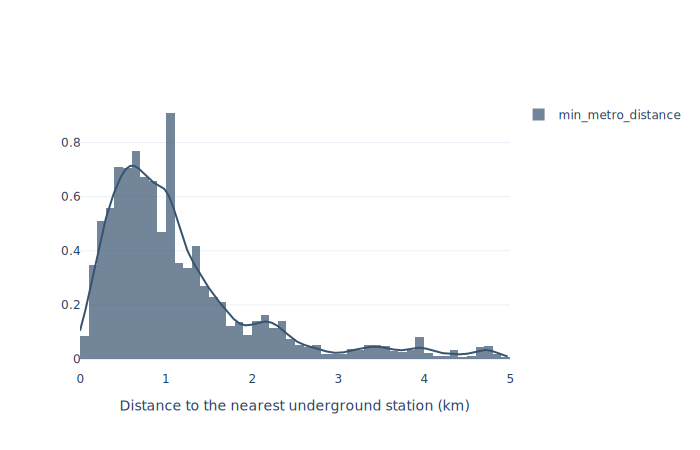

In [77]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list((df['min_metro_distance'].dropna()).values)],["min_metro_distance"],bin_size=0.1,show_rug=False,colors=['rgb(55, 83, 109)'],curve_type="kde")
fig.update_layout(xaxis=dict(title='Distance to the nearest underground station (km)'),
                  template="plotly_white")
fig.show()

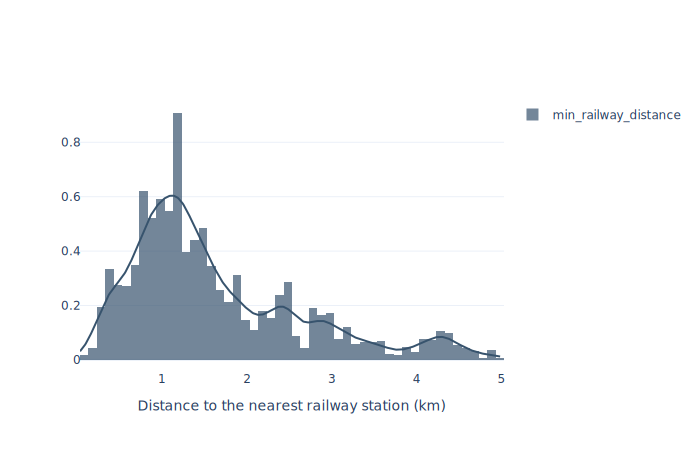

In [78]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list((df['min_railway_distance'].dropna()).values)],["min_railway_distance"],bin_size=0.1,show_rug=False,colors=['rgb(55, 83, 109)'],curve_type="kde")
fig.update_layout(xaxis=dict(title='Distance to the nearest railway station (km)'),
                  template="plotly_white")
fig.show()

In [79]:
#определяем расстояние до центра города
#координаты центра города (Красная площадь)
city_center_coordinates = [55.7522, 37.6156]
from geopy.distance import geodesic 
df["distance"]=list(map(lambda x, y: geodesic(city_center_coordinates, [x, y]).kilometers, df['latitude'], df['longitude']))

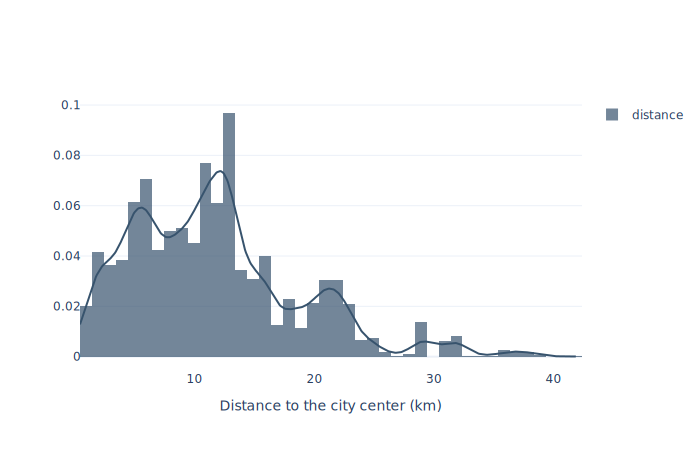

In [80]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list((df['distance'].dropna()).values)],["distance"],bin_size=1,show_rug=False,colors=['rgb(55, 83, 109)'],curve_type="kde")
fig.update_layout(xaxis=dict(title='Distance to the city center (km)'),
                  template="plotly_white")
fig.show()

In [81]:
#код по получению расстояния и азимута: https://github.com/maxbobkov/ml_moscow_flats/blob/master/moscow_flats_models.ipynb

In [82]:
import math
def get_azimuth(latitude, longitude):
 
    rad = 6372795

    llat1 = city_center_coordinates[0]
    llong1 = city_center_coordinates[1]
    llat2 = latitude
    llong2 = longitude

    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)

    x = (cl1*sl2) - (sl1*cl2*cdelta)
    y = sdelta*cl2
    z = math.degrees(math.atan(-y/x))

    if (x < 0):
        z = z+180.

    z2 = (z+180.) % 360. - 180.
    z2 = - math.radians(z2)
    anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    angledeg = (anglerad2*180.)/math.pi
    
    return angledeg

In [83]:
#определяем азимут
city_center_coordinates = [55.7522, 37.6156]
df["azimuth"]=list(map(lambda x, y: get_azimuth(x, y), df['latitude'], df['longitude']))

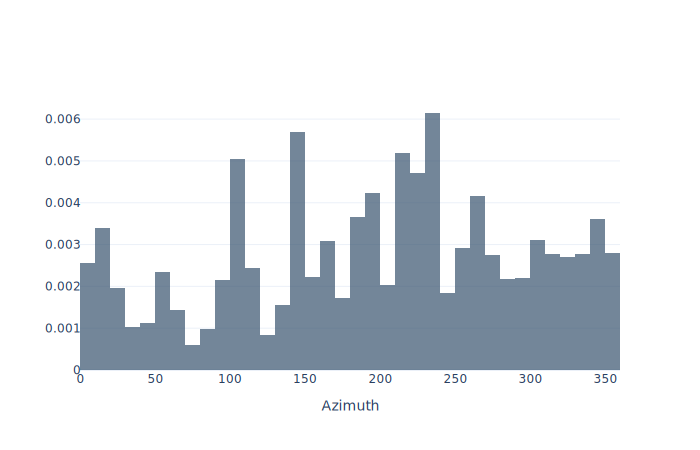

In [84]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list((df['azimuth'].dropna()).values)],["azimuth"],bin_size=10,show_rug=False,colors=['rgb(55, 83, 109)'],show_curve=False)
fig.update_layout(xaxis=dict(title='Azimuth'),
                  template="plotly_white")
fig.show()

In [85]:
#заполним пропуски в столбцах с минимальным и максимальным расстоянием до метро или жд максимальными значениями в этих столбцах
df["min_railway_distance"].fillna(max(df["min_railway_distance"]),inplace=True)
df["min_metro_distance"].fillna(max(df["min_metro_distance"]),inplace=True)

In [86]:
#теперь осталось разобраться с данными, которые были заполнены с помощью -1. Посмотрим, у каких столбцов есть эти значения
df[df==-1].count()[df[df==-1].count()>0]

roomsCount                    3281
floorNumber                     64
floorsCount                     64
buildYear                    12687
isPartOfRenovationProgram       64
dtype: int64

<AxesSubplot:>

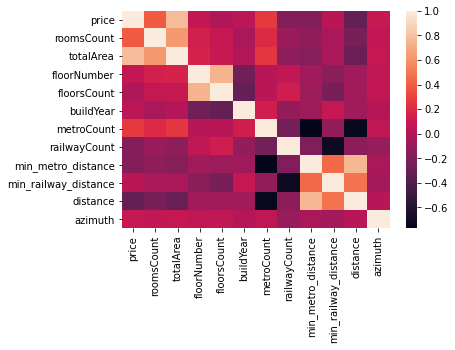

In [87]:
import seaborn as sns
sns.heatmap(df.drop(columns=["isPhone","isStudio","longitude","latitude","isPartOfRenovationProgram"]).corr().round(2))

In [88]:
#можно удалить пустые строки по столбцам floorNumber, floorsCount и isPartOfRenovationProgram, так как в них всего по 64
#пропущенные ячейки и, скорее всего, все пропуски находятся в одних и тех же строках
print("размерность датафрейма ДО удаления строк с пустыми ячейками:",df.shape)

размерность датафрейма ДО удаления строк с пустыми ячейками: (20964, 27)


In [89]:
dropped_indexes=df[["floorNumber","floorsCount","isPartOfRenovationProgram"]][df[["floorNumber","floorsCount","isPartOfRenovationProgram"]]==-1].dropna().index
df.drop(index=dropped_indexes,inplace=True)

In [90]:
print("размерность датафрейма ПОСЛЕ удаления строк с пустыми ячейками:",df.shape)

размерность датафрейма ПОСЛЕ удаления строк с пустыми ячейками: (20900, 27)


In [91]:
#в столбце buildYear зачастую отсутствуют данные у новостроек, проверим, сколько у них значений, равных -1
#сначала определим, сколько всего новостроек
df["offerType"][df["offerType"]=="Новостройка"].count()

10414

In [92]:
#всего пропусков в столбце buildYear
df[df==-1].count()[df[df==-1].count()>0]["buildYear"]

12623

In [93]:
#получается, что около 2200 пропусков из 12623 в столбце buildyear принадлежат значениям "нет" и "Вторичная", можно их также удалить
df.drop(index=df[df["offerType"].map(lambda x: x=="Вторичная" or x=="нет")][df["buildYear"]==-1].index,inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)
df

<ipython-input-93-cade98ed0dc3>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



price  roomsCount  isStudio  totalArea  \
0       79530000.0           3         0      143.0   
1       31675855.0           2         0      106.0   
2        8700000.0           2         0       41.4   
3       27500000.0           3         0       80.0   
4        2300000.0          -1         1       10.7   
...            ...         ...       ...        ...   
18292   26900000.0           3         0      102.0   
18293    5587960.0          -1         1       19.6   
18294    7356768.0           1         0       38.9   
18295   25106804.0           3         0      139.5   
18296  816781900.0           9         0      550.0   

                                 developerName  \
0                                  АО «ИНТЕКО»   
1                            ООО «Бакунинская»   
2                                          нет   
3                                          нет   
4                                          нет   
...                                        ...   
18292                                      нет   
18293                                      ПИК   
18294                ООО «Лексион Девелопмент»   
18295  Компания «Capital Group» (Капитал Груп)   
18296                                      нет   

                                                  jkName  floorNumber  \
0                                  ЖК «Садовые Кварталы»            2   
1      Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...            8   
2                                                    нет            2   
3                                                    нет            5   
4                                                    нет            1   
...                                                  ...          ...   
18292                                                нет            2   
18293                     Жилой комплекс «Амурский парк»           30   
18294                                ЖК «Румянцево-Парк»           11   
18295                                      ЖК «Триколор»           41   
18296                                                нет            6   

       floorsCount  longitude   latitude  buildYear materialType    offerType  \
0               14  37.570500  55.725610         -1      Монолит  Новостройка   
1               12  37.679560  55.773980         -1      Монолит  Новостройка   
2               17  37.191187  55.965546       2014      Монолит    Вторичная   
3                8  37.555609  55.747897       1957       Кирпич    Вторичная   
4                9  37.596049  55.615044       1970       Панель    Вторичная   
...            ...        ...        ...        ...          ...          ...   
18292            8  37.658589  55.823388       1958       Кирпич    Вторичная   
18293           33  37.755070  55.805920       2009       Панель  Новостройка   
18294           22  37.418660  55.631650         -1      Монолит  Новостройка   
18295           56  37.658030  55.834460         -1      Монолит  Новостройка   
18296            7  37.593524  55.764197       1912      Монолит    Вторичная   

       isPhone                  rayon  \
0            1              Хамовники   
1            1              Басманный   
2            1             Зеленоград   
3            1           Дорогомилово   
4            1  Чертаново Центральное   
...        ...                    ...   
18292        1           Алексеевский   
18293        1              Гольяново   
18294        1                    нет   
18295        1              Ростокино   
18296        1            Пресненский   

                                             description livingArea  \
0      «Садовые кварталы» - уникальная концепция прем...       -1.0   
1      Предлагается 2-комнатные апартаменты, общей пл...       -1.0   
2      Евродвушка на базе 1-комнатной квартиры свобод...         29   
3      Лот 62247. В западном округе Москвы в кирпично...       -1.0   
4      Продам уютную небольшую студию всего в 5 минут

In [94]:
#вставляем значение следующего года (2021) у новостроек, т.к. они ещё не построены
df["buildYear"].replace(-1,2021,inplace=True)

In [95]:
#теперь сделаем так, чтобы столбец buildYear показывал количество лет с постройки этого дома
df["buildYear"]=abs(df["buildYear"]-2021)

In [96]:
#посмотрим, какие столбцы остались со значениями -1
df[df==-1].count()[df[df==-1].count()>0]

roomsCount    2936
dtype: int64

In [97]:
#т.к. это столбец с количеством комнат, посмотрим, сколько студий
df[df["roomsCount"]==-1][df["isStudio"]==1]

<ipython-input-97-6d5d01635279>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



price  roomsCount  isStudio  totalArea  \
4      2300000.0          -1         1       10.7   
5      4900000.0          -1         1       22.1   
7      5179900.0          -1         1       27.7   
10     3400000.0          -1         1       16.0   
14     8037559.0          -1         1       26.9   
...          ...         ...       ...        ...   
18263  5450000.0          -1         1       15.0   
18264  4789980.0          -1         1       18.2   
18278  3150000.0          -1         1       16.5   
18285  2650000.0          -1         1       13.0   
18293  5587960.0          -1         1       19.6   

                                           developerName  \
4                                                    нет   
5                                                    нет   
7      Компания Seven Suns Development (Севен Санс Де...   
10                                                   нет   
14                             Level Group (Лэвел Групп)   
...                                                  ...   
18263                                                нет   
18264                                                нет   
18278                                                нет   
18285                                                нет   
18293                                                ПИК   

                                     jkName  floorNumber  floorsCount  \
4                                       нет            1            9   
5                                       нет            1            5   
7                        ЖК «Сказочный лес»           11           25   
10                                      нет            1            5   
14     ЖК «Level Амурская» (Левел Амурская)           34           39   
...                                     ...          ...          ...   
18263                                   нет            1            4   
18264                                   нет            1            5   
18278                                   нет            1            9   
18285                                   нет            1           12   
18293        Жилой комплекс «Амурский парк»           30           33   

       longitude   latitude  buildYear materialType    offerType  isPhone  \
4      37.596049  55.615044         51       Панель    Вторичная        1   
5      37.547495  55.739803         87       Кирпич    Вторичная        1   
7      37.715290  55.849090          0      Монолит  Новостройка        1   
10     37.703999  55.747687         63      Монолит    Вторичная        1   
14     37.759190  55.809310          0      Монолит  Новостройка        1   
...          ...        ...        ...          ...          ...      ...   
18263  37.610009  55.747703        108       Кирпич    Вторичная        1   
18264  37.577229  55.787556         84       Кирпич    Вторичная        1   
18278  37.802850  55.722522         51       Панель    Вторичная        1   
18285  37.767142  55.671047         40       Панель    Вторичная        1   
18293  37.755070  55.805920         12       Панель  Новостройка        1   

                       rayon  \
4      Чертаново Центральное   
5               Дорогомилово   
7                Ярославский   
10                 Лефортово   
14                 Гольяново   
...                      ...   
18263              Хамовники   
18264                Беговой   
18278                Вешняки   
18285                Люблино   
18293              Гольяново   

                                             description livingArea  \
4      Продам уютную небольшую студию всего в 5 минут...       -1.0   
5      Продается СТУДИЯ 22.1 м2 в двух минутах от мет...       -1.0   
7      Продаётся 1-комнатная квартира в новостройке Ж...       -1.0   
10     Продается студия 16м, санузел совмещен. Год по...       -1.0   
14     Продаётся 1-комнатная квартира в новостройке Ж...       -1.0   
...                                     

In [98]:
#так как подавляющее большинство пропусков в столбце roomsCount являются студиями, то вместо значения -1 вставим значение 1
#(будем считать, что студия - это однокомнатная квартира)
#сначала удалим строки, где квартиры не являются студиями и при этом не указано количество комнат
df.drop(index=df[df["roomsCount"]==-1][df["isStudio"]==0].index,inplace=True)

<ipython-input-98-b6e789c75499>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [99]:
df["roomsCount"]=abs(df["roomsCount"])

<AxesSubplot:>

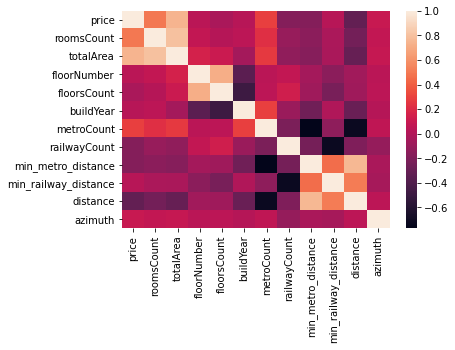

In [100]:
sns.heatmap(df.drop(columns=["isPhone","isStudio","longitude","latitude","isPartOfRenovationProgram"]).corr().round(2))

In [101]:
import numpy as np
np.bincount(df["isPhone"])

array([    0, 18289], dtype=int64)

In [102]:
#удалим колонку isPhone, так как она целиком заполнена только единицами
df.drop(columns=["isPhone"],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)
df.shape

(18289, 26)

In [103]:
#посмотрим ещё раз на типы данных, всё ли в порядке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      18289 non-null  float64
 1   roomsCount                 18289 non-null  int32  
 2   isStudio                   18289 non-null  int32  
 3   totalArea                  18289 non-null  float64
 4   developerName              18289 non-null  object 
 5   jkName                     18289 non-null  object 
 6   floorNumber                18289 non-null  int32  
 7   floorsCount                18289 non-null  int32  
 8   longitude                  18289 non-null  float64
 9   latitude                   18289 non-null  float64
 10  buildYear                  18289 non-null  int32  
 11  materialType               18289 non-null  object 
 12  offerType                  18289 non-null  object 
 13  rayon                      18289 non-null  obj

In [104]:
#у kitchenArea и livingArea показан тип object, то есть текст, хотя они должны быть типа float. Приводим их к этому типу
#также у них надо удалить пропуски (значения, равные -1)
df["kitchenArea"]=df["kitchenArea"].astype("float64")
df["livingArea"]=df["livingArea"].astype("float64")

In [105]:
df["livingArea"].value_counts()

-1.0      6718
 20.0      192
 15.0      165
 30.0      153
 12.0      152
          ... 
 83.3        1
 97.7        1
 7.5         1
 176.0       1
 64.6        1
Name: livingArea, Length: 857, dtype: int64

In [106]:
df["kitchenArea"].value_counts()

-1.0     6959
 2.0      869
 10.0     564
 6.0      484
 9.0      323
         ... 
 42.7       1
 59.0       1
 51.7       1
 70.0       1
 28.6       1
Name: kitchenArea, Length: 362, dtype: int64

In [107]:
#посмотрим на корреляцию kitchenArea и цены
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["price"].values)

array([[1.        , 0.36794985],
       [0.36794985, 1.        ]])

In [108]:
#то же самое с livingArea
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["price"].values)

array([[1.        , 0.70730881],
       [0.70730881, 1.        ]])

In [109]:
#связь с totalArea
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["totalArea"].values)

array([[1.        , 0.54567976],
       [0.54567976, 1.        ]])

In [110]:
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["totalArea"].values)

array([[1.        , 0.93478491],
       [0.93478491, 1.        ]])

In [111]:
#соотношение totalArea и kitchenArea
total_kitchen=sum(df[df["kitchenArea"]>=0]["totalArea"])/sum(df[df["kitchenArea"]>=0]["kitchenArea"])
total_kitchen

4.825072274725219

In [112]:
#соотношение totalArea и livingArea
total_living=sum(df[df["livingArea"]>=0]["totalArea"])/sum(df[df["livingArea"]>=0]["livingArea"])
total_living

1.8249509627047273

In [113]:
df["c_kitchen"]=df["totalArea"]/total_kitchen
df["c_kitchen"]

0         29.636862
1         21.968583
2          8.580182
3         16.580063
4          2.217583
            ...    
18284     21.139580
18285      4.062115
18286      8.062055
18287     28.911484
18288    113.987930
Name: c_kitchen, Length: 18289, dtype: float64

In [114]:
df["c_living"]=df["totalArea"]/total_living
df["c_living"]

0         78.358270
1         58.083752
2         22.685541
3         43.836794
4          5.863171
            ...    
18284     55.891913
18285     10.740015
18286     21.315641
18287     76.440410
18288    301.377961
Name: c_living, Length: 18289, dtype: float64

In [115]:
#производим замену значений, которые равны -1.0
df.loc[df["livingArea"]<0,"livingArea"]=df["c_living"]
df["livingArea"]

0         78.358270
1         58.083752
2         29.000000
3         43.836794
4          5.863171
            ...    
18284     63.000000
18285      9.400000
18286     13.400000
18287     76.440410
18288    301.377961
Name: livingArea, Length: 18289, dtype: float64

In [116]:
df.loc[df["kitchenArea"]<0,"kitchenArea"]=df["c_kitchen"]
df["kitchenArea"]

0         29.636862
1         21.968583
2          8.000000
3         16.580063
4          2.217583
            ...    
18284      9.000000
18285      5.000000
18286     13.700000
18287     28.911484
18288    113.987930
Name: kitchenArea, Length: 18289, dtype: float64

In [117]:
#заново смотрим корреляции (kitchenArea и totalArea)
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["totalArea"].values)

array([[1.        , 0.84456895],
       [0.84456895, 1.        ]])

In [118]:
#livingArea и totalArea
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["totalArea"].values)

array([[1.        , 0.97236199],
       [0.97236199, 1.        ]])

In [119]:
#kitchenArea и price
np.corrcoef(df[df["kitchenArea"]>=0]["kitchenArea"].values,df[df["kitchenArea"]>=0]["price"].values)

array([[1.       , 0.6667355],
       [0.6667355, 1.       ]])

In [120]:
#livingArea и price
np.corrcoef(df[df["livingArea"]>=0]["livingArea"].values,df[df["livingArea"]>=0]["price"].values)

array([[1.       , 0.7268213],
       [0.7268213, 1.       ]])

In [121]:
df.drop(columns=["c_living","c_kitchen"],inplace=True)

# Final correlation matrix

<AxesSubplot:>

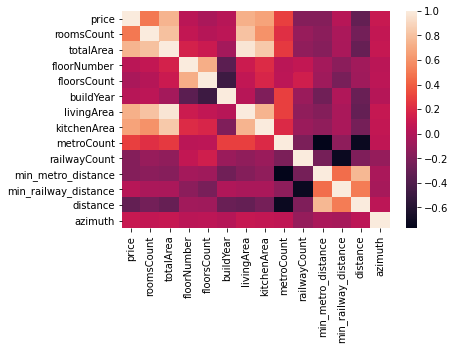

In [122]:
sns.heatmap(df.drop(columns=["longitude","latitude","isStudio","isPartOfRenovationProgram"]).corr().round(2))

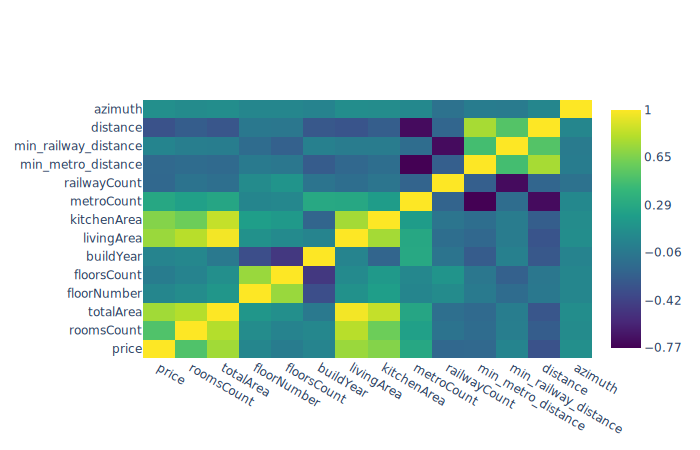

In [123]:
corr_matrix=df.drop(columns=["longitude","latitude","isStudio","isPartOfRenovationProgram"]).corr()
fig = go.Figure()
fig.add_trace(go.Heatmap(
        x=corr_matrix.index,
        y=corr_matrix.columns,
        z=corr_matrix.values,
        colorscale='Viridis',
        colorbar=dict(
    tickvals=list(np.linspace(min(corr_matrix.min()),max(corr_matrix.max()),6).round(2))
)))
fig.update_layout(template="plotly_white",
                xaxis=dict(tickmode='linear'),
                yaxis=dict(tickmode='linear'),
                width=500, height=500)

# Visualisation via city map

In [124]:
#для визуализации:
#df.to_excel("диплом данные для визуализации.xlsx")

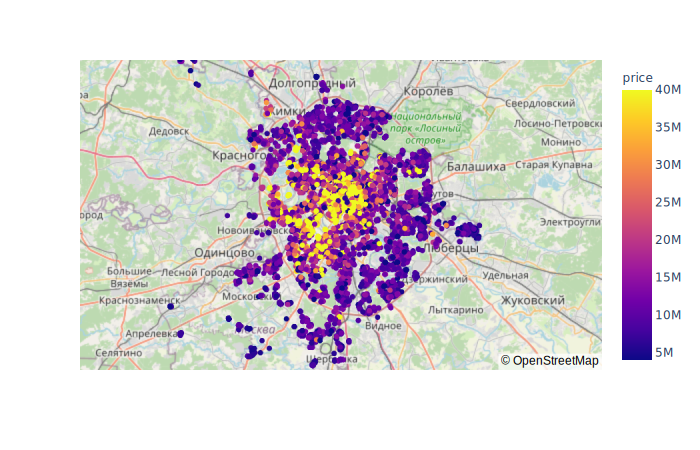

In [125]:
import plotly.express as px
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_data=["price","roomsCount","totalArea"], color="price",
                        zoom=8, height=300, range_color=[4000000,40000000,70000000,2598851500])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=900, height=600)
fig.show()

In [126]:
#уберем квартиры с площадью меньше 30 кв. метров

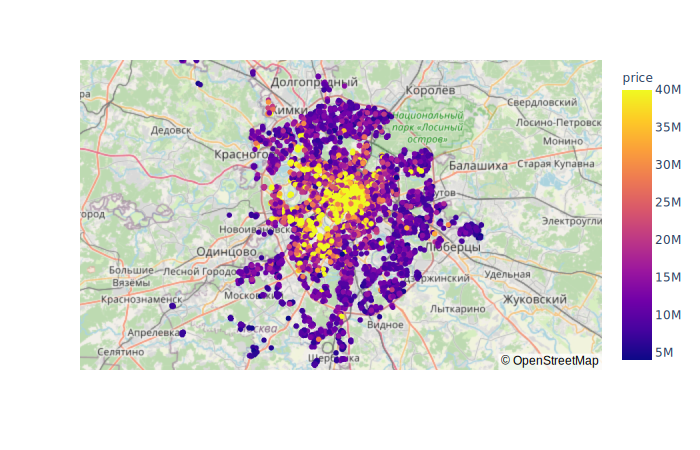

In [127]:
fig = px.scatter_mapbox(df[df["totalArea"]>=30], lat="latitude", lon="longitude", hover_data=["price","roomsCount","totalArea"], color="price",
                        zoom=8, height=300, range_color=[4000000,40000000,70000000,2598851500])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=900, height=600)
fig.show()

In [128]:
#сделаем карту по возрасту зданий

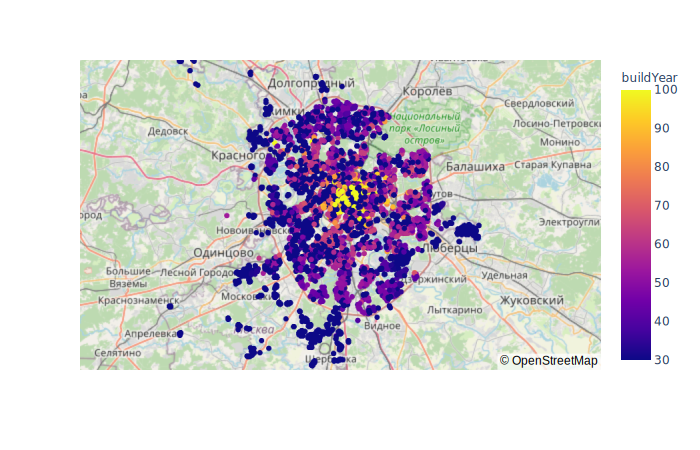

In [129]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_data=["price","roomsCount","totalArea"], color="buildYear",
                        zoom=8, height=300, range_color=[30,100])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=900, height=600)
fig.show()

In [130]:
#сделаем карту с указанием класса жилья (бизнес, люкс, эконом)

In [131]:
jk_class_map_df=df[df["jkClass"]!="нет"]

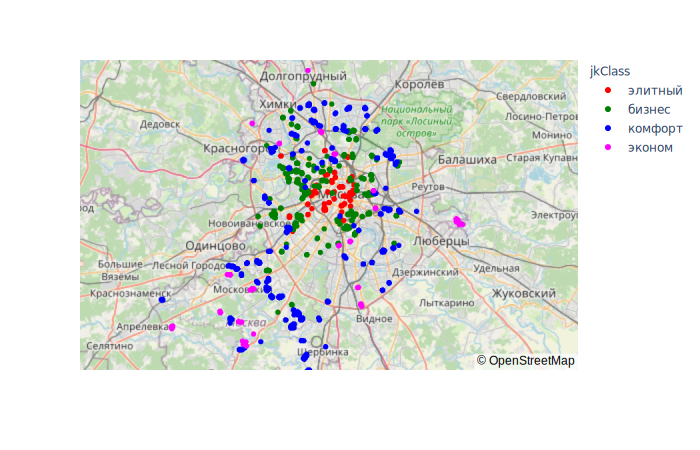

In [132]:
fig = px.scatter_mapbox(jk_class_map_df, lat="latitude", lon="longitude", hover_data=["price","roomsCount","totalArea"], color="jkClass",
                        zoom=8, height=300,color_discrete_sequence=["red", "green", "blue", "magenta"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=900, height=600)
fig.show()

In [133]:
#сохраняем нашу визуализацию
#fig.write_html("diplom_price_visualization_map.html")

In [134]:
#теперь надо закодировать все строковые элементы, сделаем это с помощью OneHotEncoder
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=["developerName"])
encoder.fit_transform(df["developerName"])

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



developerName_0  developerName_1  developerName_2  developerName_3  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
18284                0                0                0                0   
18285                0                0                0                0   
18286                0                0                0                0   
18287                0                0                0                0   
18288                0                0                0                0   

       developerName_4  developerName_5  developerName_6  developerName_7  \
0                    0                0                0                0   
1                    0                0                0                1   
2                    0                0                0                1   
3                    0                0                0                1   
4                    0                0                0                1   
...                ...              ...              ...              ...   
18284                0                0                0                1   
18285                0                1                1                0   
18286                1                1                1                0   
18287                0                0                1                1   
18288                0                0                0                1   

       developerName_8  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  
...                ...  
18284                1  
18285                1  
18286                0  
18287                0  
18288                1  

[18289 rows x 9 columns]

In [135]:
df.columns

Index(['price', 'roomsCount', 'isStudio', 'totalArea', 'developerName',
       'jkName', 'floorNumber', 'floorsCount', 'longitude', 'latitude',
       'buildYear', 'materialType', 'offerType', 'rayon', 'description',
       'livingArea', 'kitchenArea', 'isPartOfRenovationProgram',
       'adm_district', 'jkClass', 'metroCount', 'railwayCount',
       'min_metro_distance', 'min_railway_distance', 'distance', 'azimuth'],
      dtype='object')

In [136]:
#удалим столбец adm_district и offerType
df=df.drop(columns=["adm_district","offerType"])
df

price  roomsCount  isStudio  totalArea  \
0       79530000.0           3         0      143.0   
1       31675855.0           2         0      106.0   
2        8700000.0           2         0       41.4   
3       27500000.0           3         0       80.0   
4        2300000.0           1         1       10.7   
...            ...         ...       ...        ...   
18284   26900000.0           3         0      102.0   
18285    5587960.0           1         1       19.6   
18286    7356768.0           1         0       38.9   
18287   25106804.0           3         0      139.5   
18288  816781900.0           9         0      550.0   

                                 developerName  \
0                                  АО «ИНТЕКО»   
1                            ООО «Бакунинская»   
2                                          нет   
3                                          нет   
4                                          нет   
...                                        ...   
18284                                      нет   
18285                                      ПИК   
18286                ООО «Лексион Девелопмент»   
18287  Компания «Capital Group» (Капитал Груп)   
18288                                      нет   

                                                  jkName  floorNumber  \
0                                  ЖК «Садовые Кварталы»            2   
1      Апартаменты «TATLIN APARTMENTS» (Татлин Апартм...            8   
2                                                    нет            2   
3                                                    нет            5   
4                                                    нет            1   
...                                                  ...          ...   
18284                                                нет            2   
18285                     Жилой комплекс «Амурский парк»           30   
18286                                ЖК «Румянцево-Парк»           11   
18287                                      ЖК «Триколор»           41   
18288                                                нет            6   

       floorsCount  longitude   latitude  buildYear materialType  \
0               14  37.570500  55.725610          0      Монолит   
1               12  37.679560  55.773980          0      Монолит   
2               17  37.191187  55.965546          7      Монолит   
3                8  37.555609  55.747897         64       Кирпич   
4                9  37.596049  55.615044         51       Панель   
...            ...        ...        ...        ...          ...   
18284            8  37.658589  55.823388         63       Кирпич   
18285           33  37.755070  55.805920         12       Панель   
18286           22  37.418660  55.631650          0      Монолит   
18287           56  37.658030  55.834460          0      Монолит   
18288            7  37.593524  55.764197        109      Монолит   

                       rayon  \
0                  Хамовники   
1                  Басманный   
2                 Зеленоград   
3               Дорогомилово   
4      Чертаново Центральное   
...                      ...   
18284           Алексеевский   
18285              Гольяново   
18286                    нет   
18287              Ростокино   
18288            Пресненский   

                                             description  livingArea  \
0      «Садовые кварталы» - уникальная концепция прем...   78.358270   
1      Предлагается 2-комнатные апартаменты, общей пл...   58.083752   
2      Евродвушка на базе 1-комнатной квартиры свобод...   29.000000   
3      Лот 62247. В западном округе Москвы в кирпично...   43.836794   
4      Продам уютную небольшую студию всего в 5 минут...    5.863171   
...                                                  ...         ...   
18284  Предлагается просторная 3-комнатная квартира с...   63.000000   
18285  Новостройка! Продается 1-комн. кв-ра площадью ...    9.400000   
18286  Скидка до 5% при 

In [137]:
for column,dtype in zip(df.dtypes.index,df.dtypes):
    if dtype=="object" and column!="description":
        encoder=ce.BinaryEncoder(cols=column)
        encoded=encoder.fit_transform(df[column])
        df.drop(columns=column,inplace=True)
        df=pd.concat([df,encoded],axis=1)
df

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\Users\anashinpetya\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype

price  roomsCount  isStudio  totalArea  floorNumber  floorsCount  \
0       79530000.0           3         0      143.0            2           14   
1       31675855.0           2         0      106.0            8           12   
2        8700000.0           2         0       41.4            2           17   
3       27500000.0           3         0       80.0            5            8   
4        2300000.0           1         1       10.7            1            9   
...            ...         ...       ...        ...          ...          ...   
18284   26900000.0           3         0      102.0            2            8   
18285    5587960.0           1         1       19.6           30           33   
18286    7356768.0           1         0       38.9           11           22   
18287   25106804.0           3         0      139.5           41           56   
18288  816781900.0           9         0      550.0            6            7   

       longitude   latitude  buildYear  \
0      37.570500  55.725610          0   
1      37.679560  55.773980          0   
2      37.191187  55.965546          7   
3      37.555609  55.747897         64   
4      37.596049  55.615044         51   
...          ...        ...        ...   
18284  37.658589  55.823388         63   
18285  37.755070  55.805920         12   
18286  37.418660  55.631650          0   
18287  37.658030  55.834460          0   
18288  37.593524  55.764197        109   

                                             description  livingArea  \
0      «Садовые кварталы» - уникальная концепция прем...   78.358270   
1      Предлагается 2-комнатные апартаменты, общей пл...   58.083752   
2      Евродвушка на базе 1-комнатной квартиры свобод...   29.000000   
3      Лот 62247. В западном округе Москвы в кирпично...   43.836794   
4      Продам уютную небольшую студию всего в 5 минут...    5.863171   
...                                                  ...         ...   
18284  Предлагается просторная 3-комнатная квартира с...   63.000000   
18285  Новостройка! Продается 1-комн. кв-ра площадью ...    9.400000   
18286  Скидка до 5% при 100% оплате! При покупке сраз...   13.400000   
18287  Жилой комплекс «Триколор» – это современные ин...   76.440410   
18288  ID: 1481 В продаже роскошный трехсторонний  пе...  301.377961   

       kitchenArea  isPartOfRenovationProgram  metroCount  railwayCount  \
0        29.636862                          0           9             1   
1        21.968583                          0           5             5   
2         8.000000                          0           0             0   
3        16.580063                          0           8             2   
4         2.217583                          0           7             3   
...            ...                        ...         ...           ...   
18284     9.000000                          0           5             5   
18285     5.000000                          0          10             0   
18286    13.700000                          0           3             4   
18287    28.911484                          0           6             4   
18288   113.987930                          0          10             0   

       min_metro_distance  min_railway_distance   distance     azimuth  \
0                   0.609                 1.888   4.097481  223.695840   
1                   0.178                 1.233   4.690487   58.788996   
2                   4.982                 4.998  35.644858  312.025628   
3                   0.803                 0.798   3.797479  262.762437   
4                   0.631                 2.477  15.319849  184.602598   
...                   ...                   ...        ...         ...   
18284               1.119                 0.993   8.372185   18.736489   
18285               0.643                 4.998  10.600085   55.535488   
18286               1.052                 2.387  18.262844  222.720579   
18287               0.842    

In [138]:
#надо дропнуть столбцы с нулевой суммой

In [139]:
for column,dtype in zip(df.columns,df.dtypes):
    if dtype!="object" and sum(df[column])==0:
        df.drop(columns=column,inplace=True)

In [140]:
df.drop(columns=["description"],inplace=True)

In [141]:
#df.drop(columns=["longitude","latitude"],inplace=True)

In [142]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
def print_metrics(prediction, val_y):
    val_mae = mean_absolute_error(val_y, prediction)
    median_AE = median_absolute_error(val_y, prediction)
    r2 = r2_score(val_y, prediction)

    print('')
    print('R\u00b2: {:.2}'.format(r2))
    print('')
    print('Средняя абсолютная ошибка: {:.3} %'.format(mean_absolute_percentage_error(val_y, prediction)))
    print('Медианная абсолютная ошибка: {:.3} %'.format(median_absolute_percentage_error(val_y, prediction)))
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
y=df.iloc[:,0].values
X=df.iloc[:,1:].values
y=np.log(y)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=2)
rf.fit(train_X,train_y)

RandomForestRegressor()

In [144]:
from sklearn.model_selection import cross_val_score
print("перекрестная проверка", cross_val_score(rf, X, np.ravel(y), cv=5))

перекрестная проверка [0.97633655 0.97395004 0.97320749 0.97714897 0.97479704]


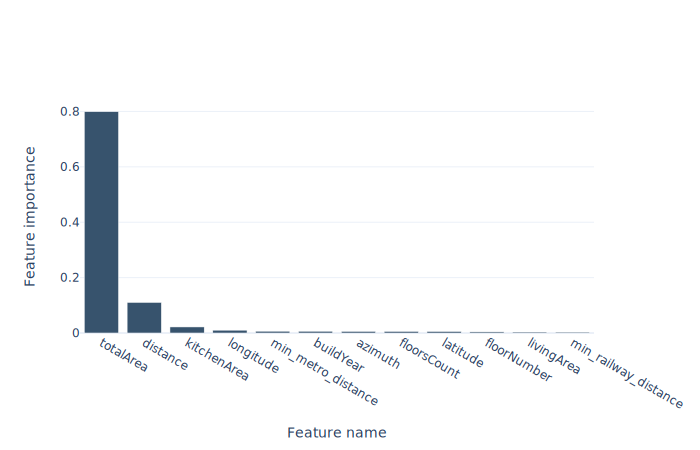

In [148]:
fig=go.Figure([go.Bar(x=list(features_sorted.index),y=features_sorted["Значения"].values,
                      marker_color='rgb(55, 83, 109)')])
fig.update_layout(yaxis=dict(title='Feature importance'),
                  xaxis=dict(title='Feature name'),
                  template="plotly_white")

In [159]:
average_price=[]
for year in np.unique(df["buildYear"]):
    df_year=df.copy()
    df_year["buildYear"]=year
    X=df_year.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

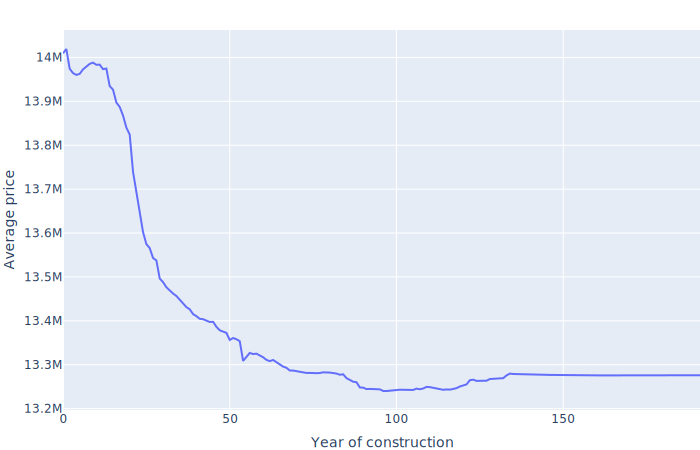

In [160]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["buildYear"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Year of construction",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [161]:
#должна быть корреляция между возрастом здания и близостью к центру (например), или этажностью

Скорее всего анализ по году постройки не получился потому, что у строений с разным возрастом есть какие-то сопутствующие характеристики - например, старые здания, как правило, находятся в центре города и в таких квартирах большая площадь.Если мы присваиваем большой возраст новостройкам с их характеристиками, которые, как правило, имеют меньшую площадь и находятся на краю Москвы, то по факту это будет означать, что, возможно, здание уже аварийное. К тому же на сайте преобладали в основном новостройки. Поэтому возраст здания нельзя рассматривать совместно с другими характеристиками, только отдельно 

Для более быстрых расчетов следующих графиков можно округлить рассматриваемые значения (чтобы было меньше уникальных значений)

In [162]:
average_price=[]
for azimuth in list(range(0,361)):
    df_azimuth=df.copy()
    df_azimuth["azimuth"]=azimuth
    X=df_azimuth.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

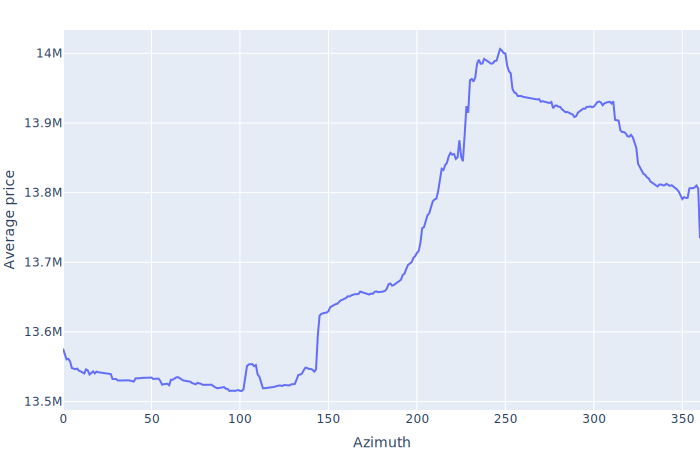

In [163]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0,361)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Azimuth",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [164]:
average_price=[]
for distance in np.unique(df["distance"].round(1)):
    df_distance=df.copy()
    df_distance["distance"]=distance
    X=df_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

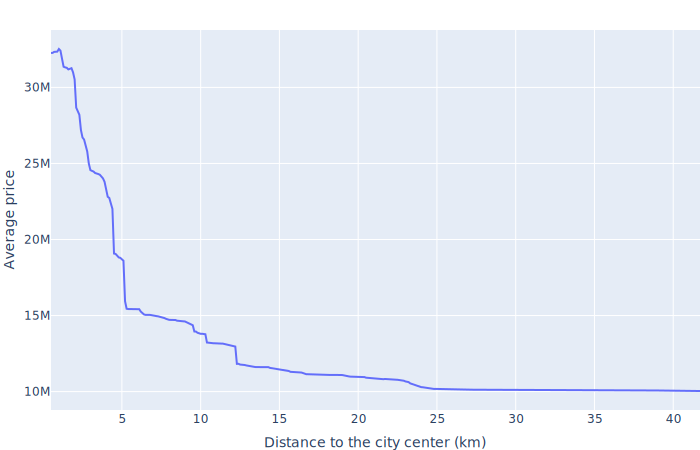

In [165]:
#исправить подпись к графику
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["distance"].round(1)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Distance to the city center (km)",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [166]:
average_price=[]
for floor_number in np.unique(df["floorNumber"]):
    df_floor_number=df.copy()
    df_floor_number["floorNumber"]=floor_number
    X=df_floor_number.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

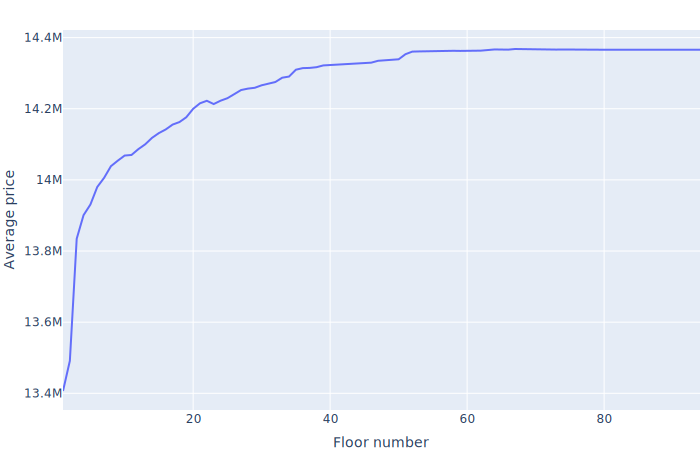

In [167]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["floorNumber"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Floor number",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [168]:
average_price=[]
for floors_count in np.unique(df["floorsCount"]):
    df_floors_count=df.copy()
    df_floors_count["floorsCount"]=floors_count
    X=df_floors_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

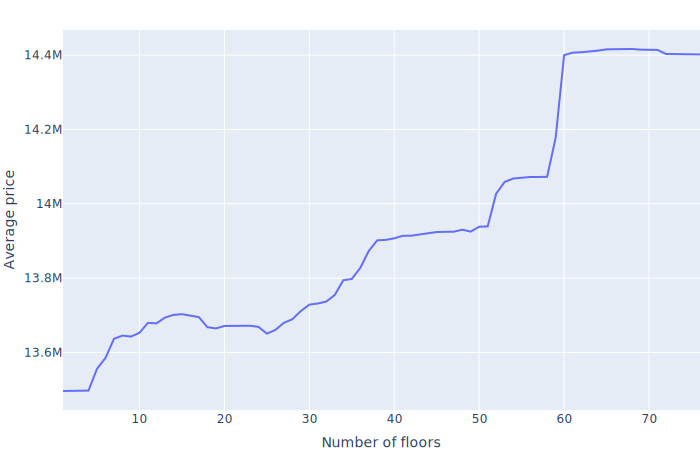

In [169]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["floorNumber"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Number of floors",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [170]:
average_price=[]
for rooms_count in np.unique(df["roomsCount"]):
    df_rooms_count=df.copy()
    df_rooms_count["roomsCount"]=rooms_count
    X=df_rooms_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

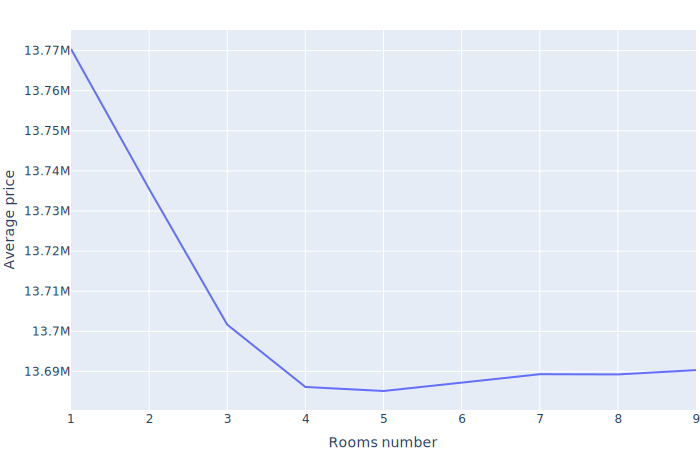

In [171]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["roomsCount"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Rooms number",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Возможно, понижение стоимости квартиры в зависимости от количества комнат также связано с тем, что основная часть квартир имеет общую площадь примерно 50-80 квадратных метров, соответственно, если там будет большое количество комнат (допустим, 7), то, очевидно, стоимость квартиры снизится (перегородки будут съедать общую площадь квартиры, маленькие комнаты не очень удобны и т.д.). Скорее всего, модель учитывает соотношение общей площади к количеству комнат.

In [172]:
df["roomsCount"].value_counts()

1    6882
2    5655
3    4084
4    1153
5     453
7      40
9      11
8      11
Name: roomsCount, dtype: int64

In [173]:
average_price=[]
for metro_count in np.unique(df["metroCount"]):
    df_metro_count=df.copy()
    df_metro_count["metroCount"]=metro_count
    X=df_metro_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

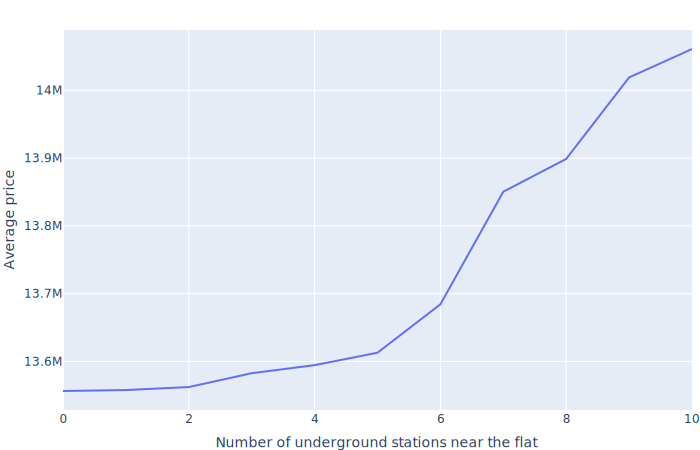

In [174]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["metroCount"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Number of underground stations near the flat",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [175]:
average_price=[]
for railway_count in np.unique(df["railwayCount"]):
    df_railway_count=df.copy()
    df_railway_count["railwayCount"]=railway_count
    X=df_railway_count.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

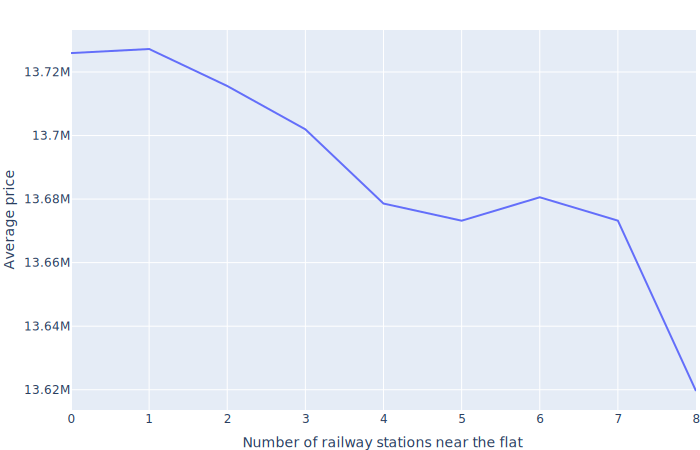

In [176]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["railwayCount"]), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Number of railway stations near the flat",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [177]:
average_price=[]
for min_metro_distance in np.unique(df["min_metro_distance"].round(2)):
    df_min_metro_distance=df.copy()
    df_min_metro_distance["min_metro_distance"]=min_metro_distance
    X=df_min_metro_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

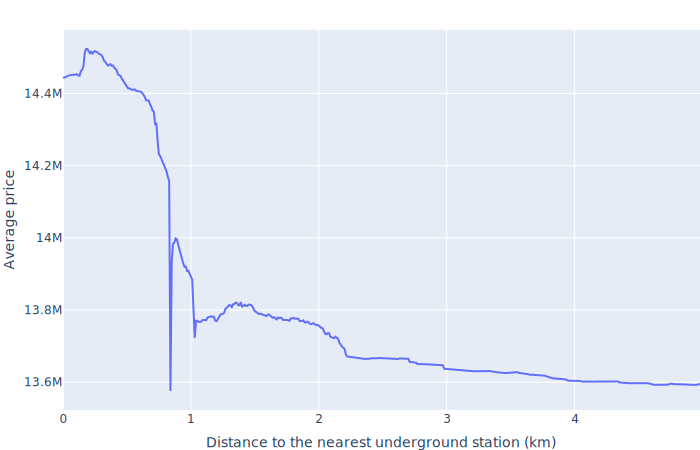

In [178]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["min_metro_distance"].round(2)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Distance to the nearest underground station (km)",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [179]:
average_price=[]
for min_railway_distance in np.unique(df["min_railway_distance"].round(2)):
    df_min_railway_distance=df.copy()
    df_min_railway_distance["min_railway_distance"]=min_railway_distance
    X=df_min_railway_distance.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

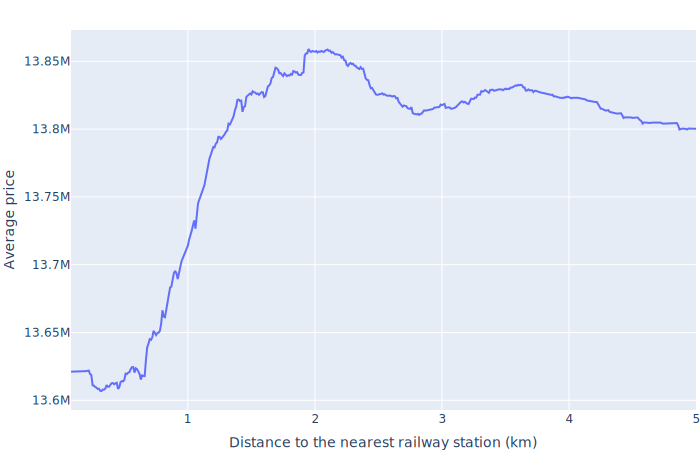

In [180]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["min_railway_distance"].round(2)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Distance to the nearest railway station (km)",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [181]:
average_price=[]
for totalArea in np.unique(df["totalArea"].round(0)):
    df_totalArea=df.copy()
    df_totalArea["totalArea"]=totalArea
    X=df_totalArea.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

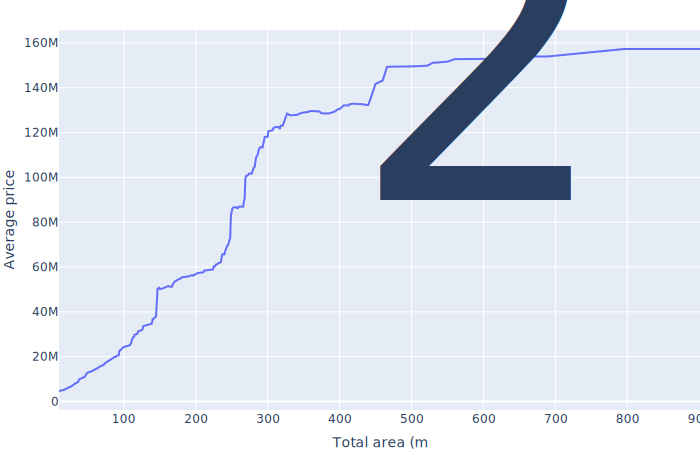

In [182]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["totalArea"].round(0)), y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Total area (m<sup>2</sup>)",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [183]:
average_price=[]
for kitchenArea in np.unique(df["kitchenArea"].round(0)):
    df_kitchenArea=df.copy()
    df_kitchenArea["kitchenArea"]=kitchenArea
    X=df_kitchenArea.iloc[:,1:]
    prediction=rf.predict(X)
    average_price.append(np.exp(np.mean(prediction)))

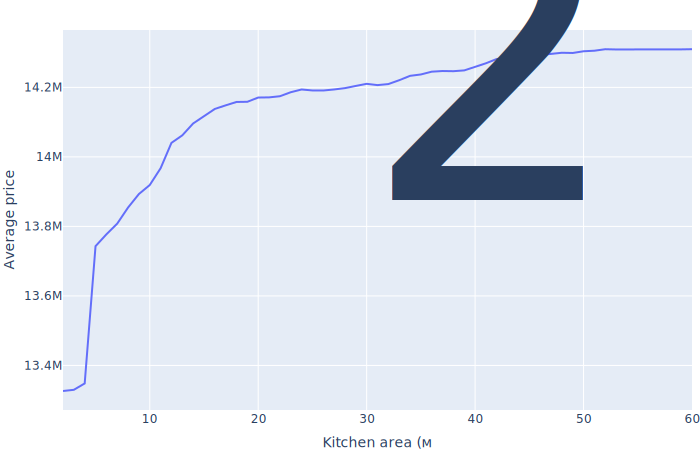

In [184]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.unique(df["kitchenArea"].round(0))[np.unique(df["kitchenArea"].round(0))<61], y=average_price, mode='lines'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  xaxis_title="Kitchen area (м<sup>2</sup>)",
                  yaxis_title="Average price",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()